# "Non Kuwaiti Over 60"
> "50 New Insights and Analysis based on Manpower Data Version: 2.0"

- toc: true
- comments: false
- categories: [Kuwait, Man-power, Analysis, Over 60]
- image: /images/MACHINE%20THINKING.png
- hide: false
- search_exclude: true
- metadata_key1: version-3.5

In [ ]:
#hide_input

!pip install pyreadstat
!pip install --upgrade plotly

In [1]:
#hide_input

import operator
import pandas as pd
import numpy as np
from datetime import datetime, date
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
#hide

#Replacing df with data read from pickle file
#Start all other version from this cell, 

df = pd.read_pickle("E:\Projects\Abdullah\Data\Analysis\DataManPowerV2.pkl")

df.columns

Index(['CIVIL_ID', 'Birth Date', 'Nationality', 'Gender', 'Religion',
       'Occupation', 'Economic Act', 'Educational Level', 'Salary',
       'Governorate', 'Marital Status', 'Company', 'Hire Date', 'جنسية',
       'Category', 'Age', 'Age Group'],
      dtype='object')

In [4]:
#hide_input

data = df[(df['Age'] >= 60) & (df['Category'] == 'Non-Kuwaiti')]


In [5]:
#hide_input

df1 = df[(df['Age'] >= 60) & (df['Category'] == 'Kuwaiti')]


In [6]:
#hide_input

print("Total no. of records for Non-Kuwaitis wth Age equal or greater than 60 : ",len(data))

Total no. of records for Non-Kuwaitis wth Age equal or greater than 60 :  75528


In [7]:
#hide_input

#will be used for comparison

print("Total no. of records for Kuwaitis wth Age equal or greater than 60 : ",len(df1))

Total no. of records for Kuwaitis wth Age equal or greater than 60 :  1614


In [8]:
#hide

data.dtypes

CIVIL_ID                      int64
Birth Date           datetime64[ns]
Nationality                  object
Gender                       object
Religion                     object
Occupation                   object
Economic Act                 object
Educational Level            object
Salary                      float64
Governorate                  object
Marital Status               object
Company                      object
Hire Date            datetime64[ns]
جنسية                       float64
Category                     object
Age                         float64
Age Group                  category
dtype: object

In [9]:
#hide

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75528 entries, 12 to 1574032
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CIVIL_ID           75528 non-null  int64         
 1   Birth Date         75528 non-null  datetime64[ns]
 2   Nationality        75528 non-null  object        
 3   Gender             75528 non-null  object        
 4   Religion           75528 non-null  object        
 5   Occupation         75528 non-null  object        
 6   Economic Act       75528 non-null  object        
 7   Educational Level  75528 non-null  object        
 8   Salary             75528 non-null  float64       
 9   Governorate        75528 non-null  object        
 10  Marital Status     75528 non-null  object        
 11  Company            75528 non-null  object        
 12  Hire Date          75523 non-null  datetime64[ns]
 13  جنسية              75528 non-null  float64       
 14  Cat

## Insight 1 - Top 20 Non-Kuwaiti Workforce Nationalities

In [10]:
#hide_input

a = dict(data['Nationality'].value_counts())
insight1 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:20])
insight1['Nationality'] = a.keys()
insight1['Total Count'] = a.values()
insight1['Percentage'] = ((insight1['Total Count'] / 75528)*100).round(2)
insight1['Percentage'] = insight1['Percentage'].astype(str) + '%'
insight1.style.background_gradient(cmap='Reds')

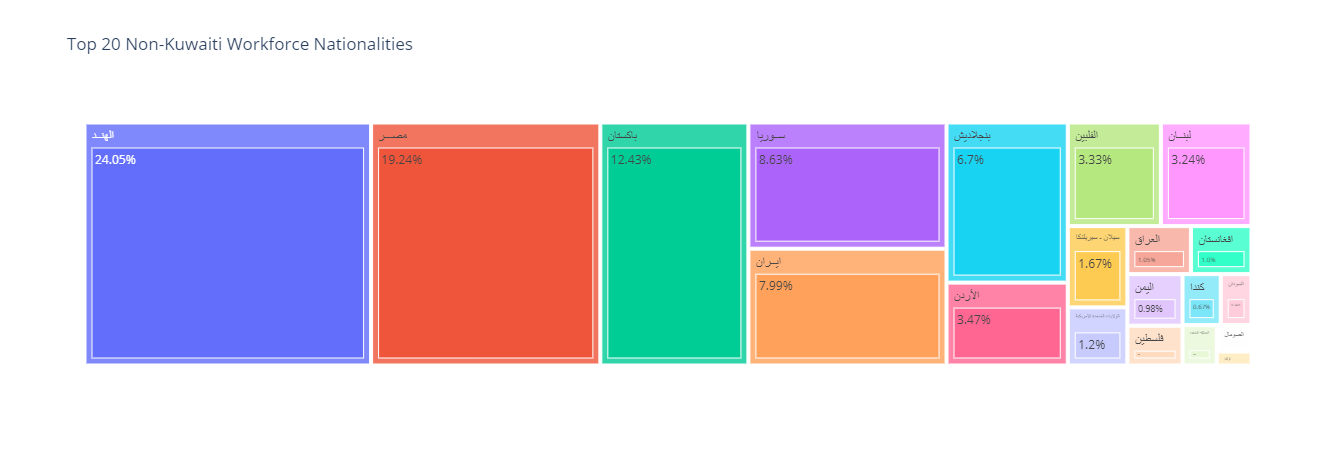

In [11]:
#hide_input

fig = px.treemap(insight1, path=['Nationality','Percentage'], values='Total Count',
                 title="Top 20 Non-Kuwaiti Workforce Nationalities")
fig.show()

# Insight 2 : Top 20 Non-Kuwaiti Workforce Occupation

In [12]:
#hide_input

insight2 = pd.DataFrame()
c = dict(data.groupby("Occupation")['Occupation'].count())
insight2['Occupation'] = c.keys()
insight2['Total Count'] = c.values()
insight2['Percentage'] = ((insight2['Total Count'] / 75528)*100).round(2) 
insight2['Percentage'] = insight2['Percentage'].astype(str) + '%'
insight2 = insight2.nlargest(20,'Total Count')
insight2.reset_index(inplace=True,drop=True)


In [13]:
#hide_input

insight2.style.background_gradient(cmap='Reds')

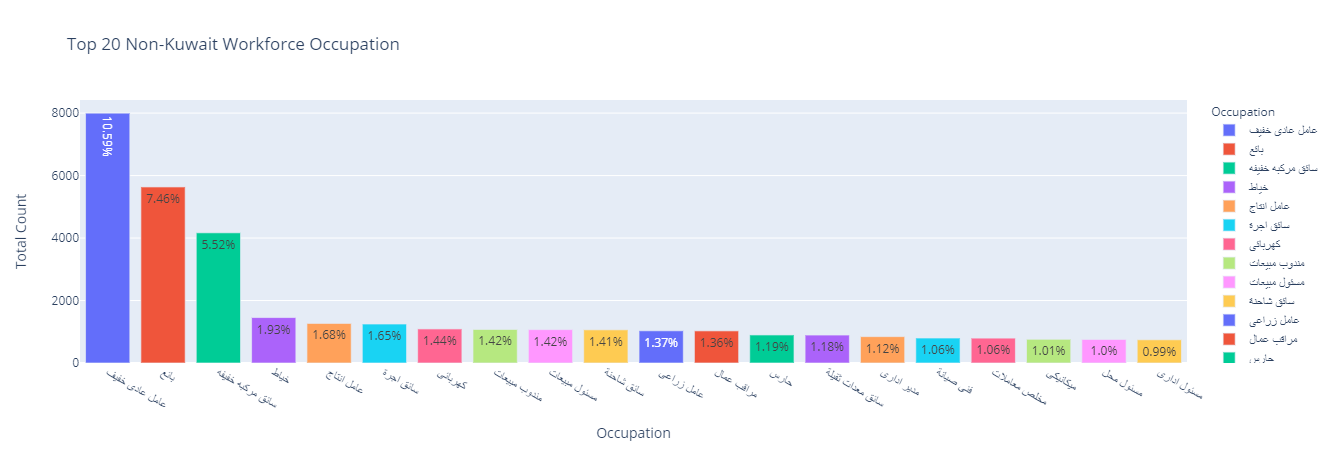

In [14]:
#hide_input

fig = px.bar(insight2, x="Occupation", y="Total Count",title ="Top 20 Non-Kuwait Workforce Occupation",color = "Occupation",
             text = "Percentage")
fig.show()

# Insight 3 : Educational Level of Non-Kuwaiti Workforce

In [15]:
#hide_input

a = dict(data['Educational Level'].value_counts())
insight3 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:20])
insight3['Educational Level'] = a.keys()
insight3['Total Count'] = a.values()
insight3['Percentage'] = ((insight3['Total Count'] / 75528)*100).round(2)
insight3['Percentage'] = insight3['Percentage'].astype(str) + "%"
insight3.reset_index(inplace=True,drop=True)


In [16]:

#hide_input

insight3.style.background_gradient(cmap='Reds')

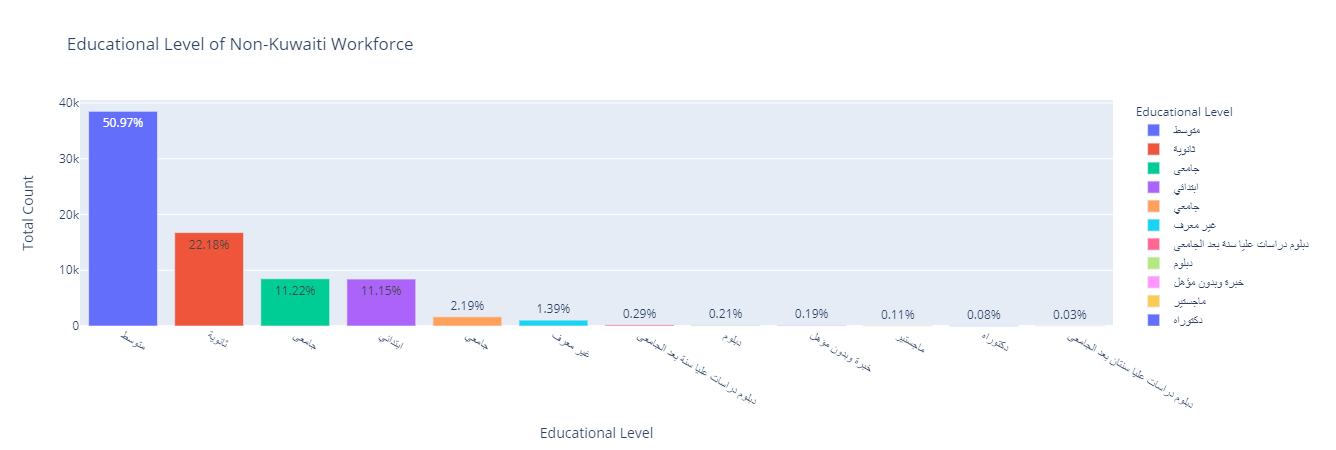

In [17]:
#hide_input

fig = px.bar(insight3, x="Educational Level", y="Total Count",text = "Percentage",
             title =" Educational Level of Non-Kuwaiti Workforce",color = "Educational Level")
fig.show()

# Insight 4 : Top 10 Companies of Non-Kuwaiti Workforce

In [18]:
#hide_input

a = dict(data['Company'].value_counts())
insight4 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:10])
insight4['Company'] = a.keys()
insight4['Total Count'] = a.values()
insight4['Percentage'] = ((insight4['Total Count'] / 75528)*100).round(2)
insight4['Percentage'] = insight4['Percentage'].astype(str) + "%"
insight4.reset_index(inplace=True,drop=True)

In [19]:
#hide_input

insight4.style.background_gradient(cmap='Reds')

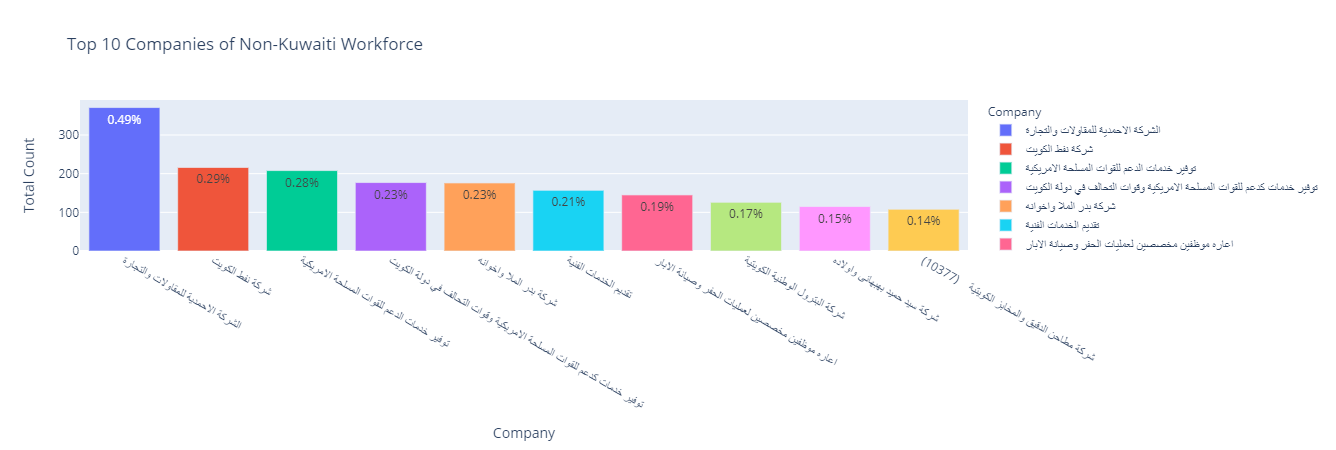

In [20]:
#hide_input

fig = px.bar(insight4, x="Company", y="Total Count",text = "Percentage",
             title ="Top 10 Companies of Non-Kuwaiti Workforce",color = "Company")
fig.show()

# Insight 5 : Salary Range of Non-Kuwaiti Workforce

In [21]:
#hide_input

bins = [0,201,301,401,501,1001,2001,3001,4001, 5001, 10000, 15000, 20000, 25000, 25001] 
labels = ['0-200','201-300','301-400','401-500','501-100','1001-2000','2001-3000','3001-4000','4001-5000','5001-10000','10001-15000', '15001-20000', '20001-25000', 'Above 25000']
data['Salary Range'] = pd.cut(data.Salary, bins, labels = labels)

In [22]:
#hide_input

a = dict(data['Salary Range'].value_counts())
insight5 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:10])
insight5['Salary Range'] = a.keys()
insight5['Total Count'] = a.values()
insight5['Percentage'] = ((insight5['Total Count'] / 75528)*100).round(2)
insight5['Percentage'] = insight5['Percentage'].astype(str) + "%"
insight5.reset_index(inplace=True,drop=True)

In [23]:
#hide_input

insight5.style.background_gradient(cmap='Reds')

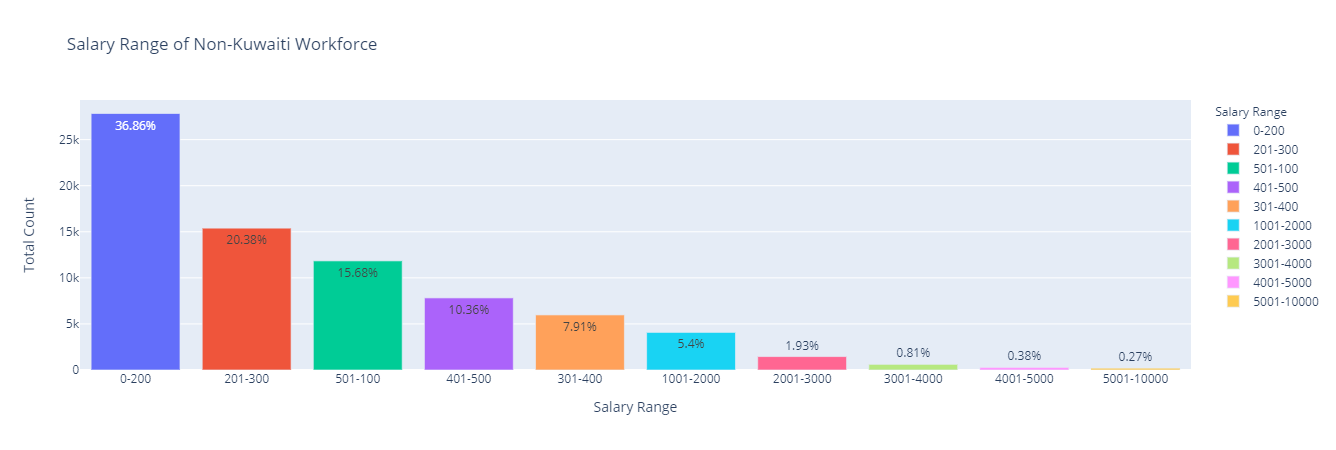

In [24]:
#hide_input

fig = px.bar(insight5, x="Salary Range", y="Total Count",text = "Percentage",
             title ="Salary Range of Non-Kuwaiti Workforce",color = "Salary Range")
fig.show()

## Insight 6 : Top 20 Occupations by Nationality of Non-Kuwaiti Workforce

In [25]:
#hide_input

data['COUNTER'] = 1 #initially, set that counter to 1.
insight6 = data.groupby(['Occupation','Nationality'])['COUNTER'].agg(['count'])
insight6['Percentage'] = ((insight6['count'] / 75528)*100).round(2)
insight6['Percentage'] = insight6['Percentage'].astype(str) + '%'
insight6 = insight6.nlargest(20,'count')
insight6 = insight6.reset_index(['Occupation','Nationality'])
insight6.reset_index(inplace=True,drop=True)

In [26]:
#hide_input

insight6.style.background_gradient(cmap='Reds')

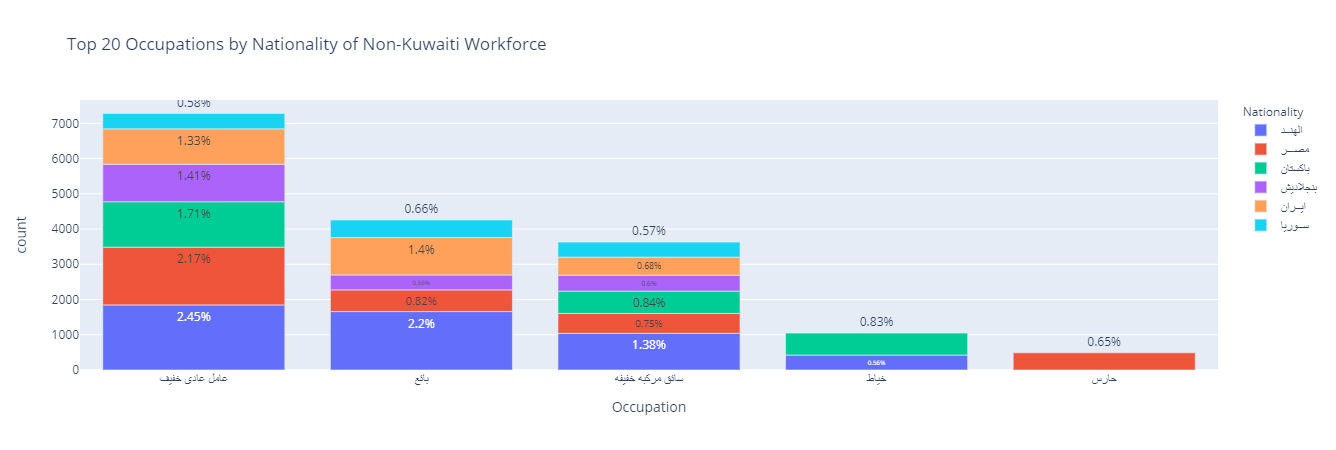

In [27]:
#hide_input

fig = px.bar(insight6, text="Percentage",x="Occupation", y="count", color='Nationality',
             title = "Top 20 Occupations by Nationality of Non-Kuwaiti Workforce")
fig.show()

# Insight 7 : Top 20 Age Group by Occupation of Non-Kuwaiti workforce

In [28]:
#hide_input

data['COUNTER'] = 1
insight7 = data.groupby(['Occupation','Age Group'])['COUNTER'].agg(['count'])
insight7['Percentage'] = ((insight7['count'] / 75528)*100).round(2) 
insight7['Percentage'] = insight7['Percentage'].astype(str) + '%'
insight7 = insight7.nlargest(20,'count')
insight7 = insight7.reset_index(['Occupation','Age Group'])
insight7.reset_index(inplace=True,drop=True)

In [29]:
#hide_input

insight7.style.background_gradient(cmap='Reds')

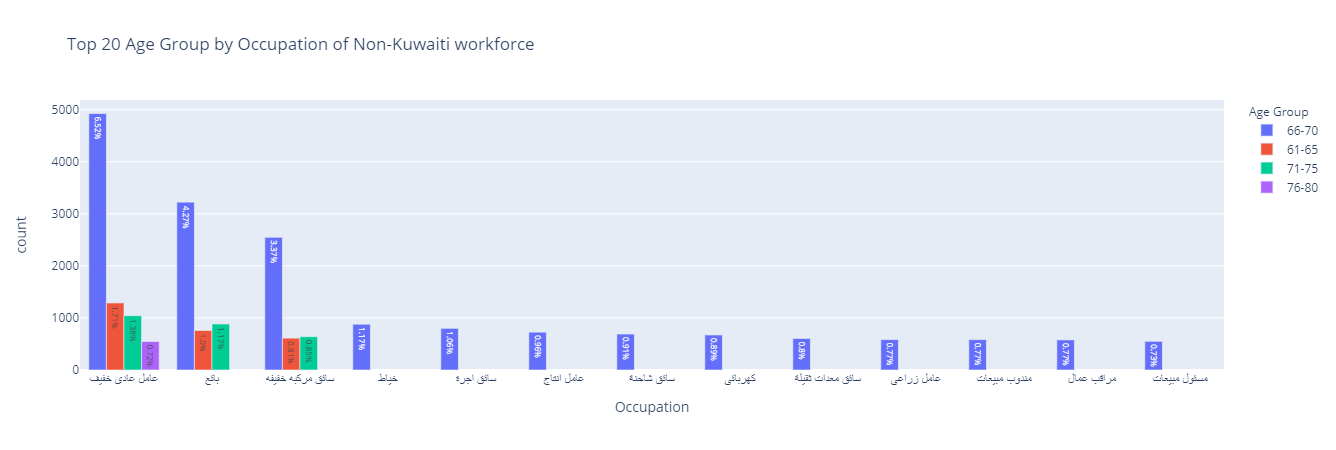

In [30]:
#hide_input

fig = px.bar(insight7, text="Percentage", x="Occupation", y="count", color="Age Group", barmode='group',
             title = "Top 20 Age Group by Occupation of Non-Kuwaiti workforce")

fig.show()

# Insight 8 : Top 20 Occupation by Educational Level of Non-Kuwaitis

In [31]:
#hide_input

data['COUNTER'] = 1
insight8 = data.groupby(['Occupation','Educational Level'])['COUNTER'].agg(['count'])
insight8['Percentage'] = ((insight8['count'] / 75528)*100).round(2) 
insight8['Percentage'] = insight8['Percentage'].astype(str) + '%'
insight8 = insight8.reset_index(['Occupation','Educational Level'])
insight8 = insight8.nlargest(20,'count')
insight8.reset_index(inplace=True,drop=True)

In [32]:
#hide_input

insight8.style.background_gradient(cmap='Reds')

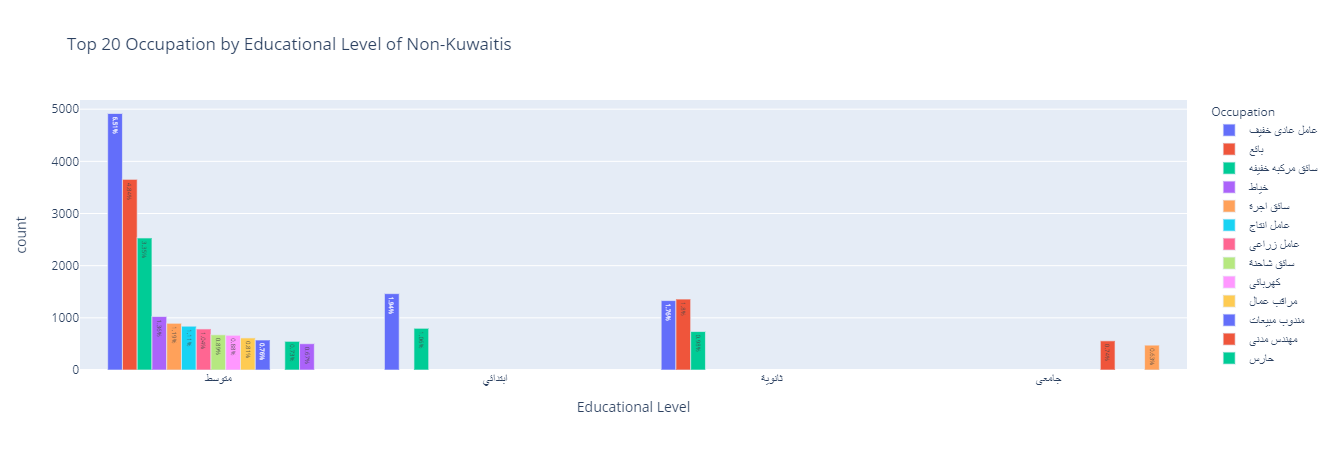

In [33]:
#hide_input

fig = px.bar(insight8, x="Educational Level", y="count", color="Occupation",barmode='group', text="Percentage",
             title = "Top 20 Occupation by Educational Level of Non-Kuwaitis")
fig.show()

# Insight 9: Non - Kuwaiti Work Force by Age Group

In [34]:
#hide_input

a = dict(data['Age Group'].value_counts())
insight9 = pd.DataFrame()
a = dict(sorted(a.items(), key=operator.itemgetter(1), reverse=True)[:20])
insight9['Age Group'] = a.keys()
insight9['Total Count'] = a.values()
insight9['Percentage'] = ((insight9['Total Count'] / 75528)*100).round(2) 
insight9['Percentage'] = insight9['Percentage'].astype(str) + '%'
insight9.style.background_gradient(cmap='Reds')

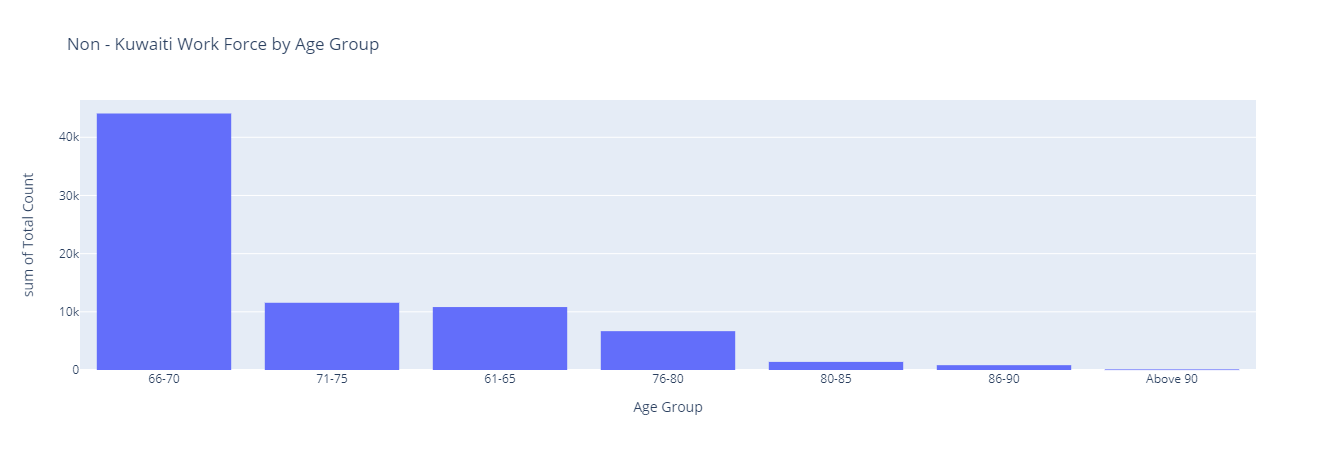

In [35]:
#hide_input

fig = px.histogram(insight9, x="Age Group", y= "Total Count",title ="Non - Kuwaiti Work Force by Age Group")
fig.show()

# Insight 10 : Top 20 Age Group by Nationality of Non-Kuwaiti Workforce

In [36]:
#hide_input

data['COUNTER'] = 1
insight10 = data.groupby(['Nationality','Age Group'])['COUNTER'].agg(['count'])
insight10['Percentage'] = ((insight10['count'] / 75528)*100).round(2) 
insight10['Percentage'] = insight10['Percentage'].astype(str) + '%'
insight10 = insight10.reset_index(['Nationality','Age Group'])
insight10= insight10.nlargest(20,'count')
insight10.reset_index(inplace=True,drop=True)

In [37]:
#hide_input

insight10.style.background_gradient(cmap='Reds')

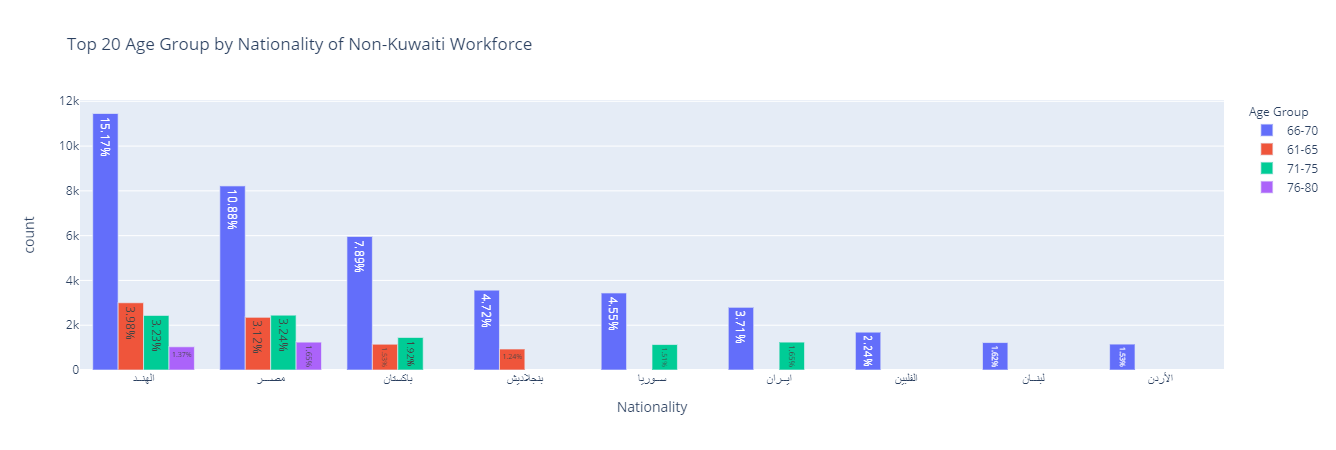

In [38]:

#hide_input

fig = px.bar(insight10,x="Nationality", y="count", color="Age Group",barmode='group', text="Percentage", 
             title = "Top 20 Age Group by Nationality of Non-Kuwaiti Workforce")
fig.show()

## Insight 11 : Top 20 Age Group by Educational Level of Non-Kuwaiti Workforce

In [39]:
#hide_input

data['COUNTER'] = 1
insight11 = data.groupby(['Educational Level','Age Group'])['COUNTER'].agg(['count'])
insight11['Percentage'] = ((insight11['count'] / 75528)*100).round(2) 
insight11['Percentage'] = insight11['Percentage'].astype(str) + '%'
insight11 = insight11.reset_index(['Educational Level','Age Group'])
insight11 = insight11.nlargest(20,'count')
insight11.reset_index(inplace=True,drop=True)

In [40]:
#hide_input

insight11.style.background_gradient(cmap='Reds')

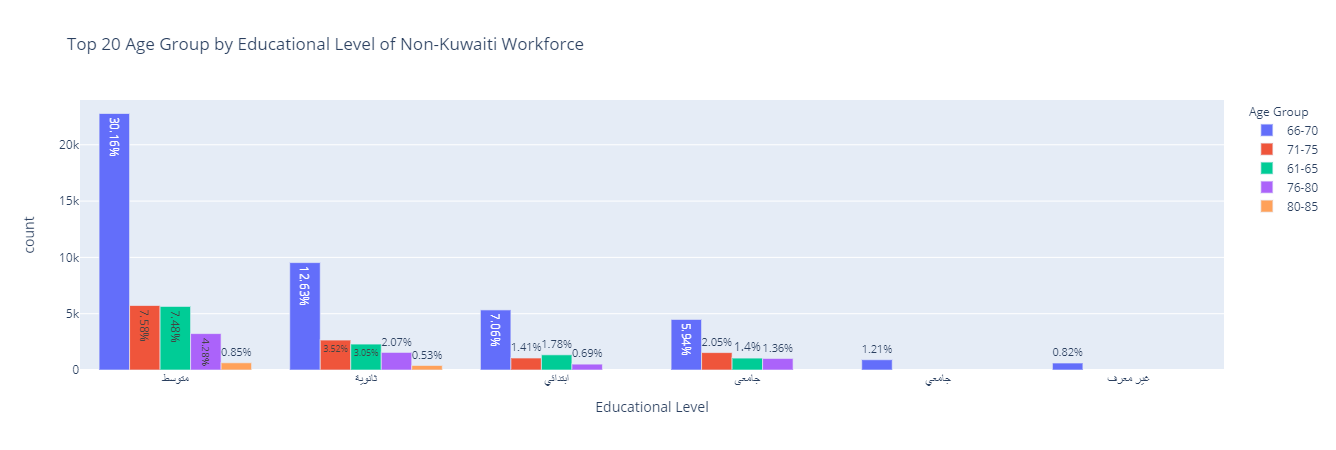

In [41]:
#hide_input

fig = px.bar(insight11,x="Educational Level", y="count", color="Age Group",barmode='group', text = "Percentage",
             title = "Top 20 Age Group by Educational Level of Non-Kuwaiti Workforce")
fig.show()

# Insight 12 : Top 20 Age Group by Marital Status of Non-Kuwaiti workforce

In [42]:
#hide_input

data['COUNTER'] = 1
insight12 = data.groupby(['Marital Status','Age Group'])['COUNTER'].agg(['count'])
insight12['Percentage'] = ((insight12['count'] / 75528)*100).round(2) 
insight12['Percentage'] = insight12['Percentage'].astype(str) + '%'
insight12 = insight12.reset_index(['Marital Status','Age Group'])
insight12 = insight12.nlargest(20,'count')
insight12.reset_index(inplace=True,drop=True)

In [43]:
#hide_input

insight12.style.background_gradient(cmap='Reds')

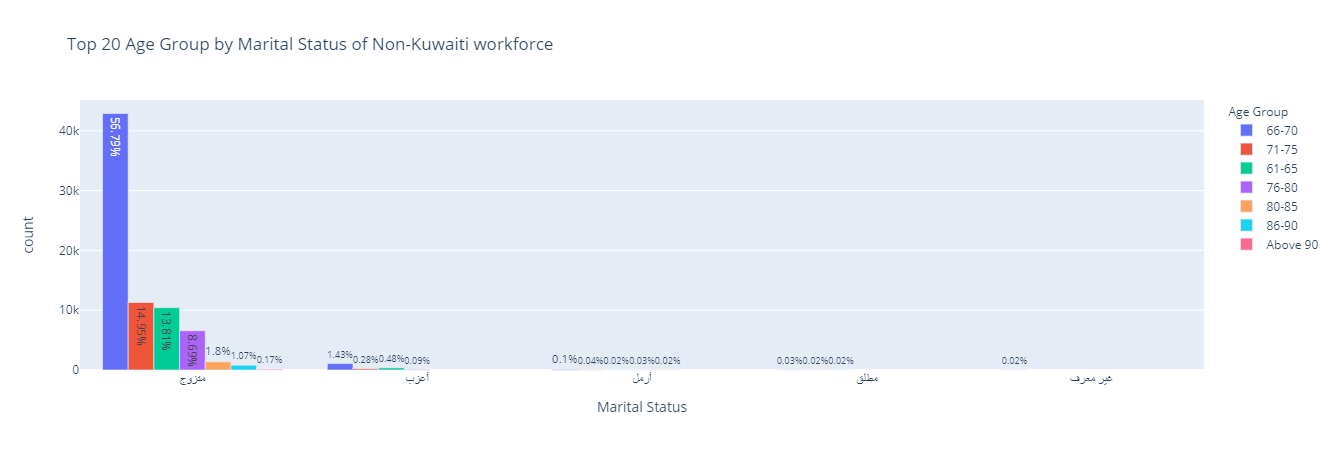

In [44]:
#hide_input

fig = px.bar(insight12,x="Marital Status", y="count", color="Age Group",barmode='group', text = "Percentage",
             title = "Top 20 Age Group by Marital Status of Non-Kuwaiti workforce")
fig.show()

# Insight 13 : Top 20 Age Group by Companies of Non-Kuwaiti Workforce

In [45]:
#hide_input

data['COUNTER'] = 1
insight13 = data.groupby(['Company','Age Group'])['COUNTER'].agg(['count'])
insight13['Percentage'] = ((insight13['count'] / 75528)*100).round(2) 
insight13['Percentage'] = insight13['Percentage'].astype(str) + '%'
insight13 = insight13.reset_index(['Company','Age Group'])
insight13 = insight13.nlargest(20,'count')
insight13.reset_index(inplace=True,drop=True)

In [46]:
#hide_input

insight13.style.background_gradient(cmap='Reds')

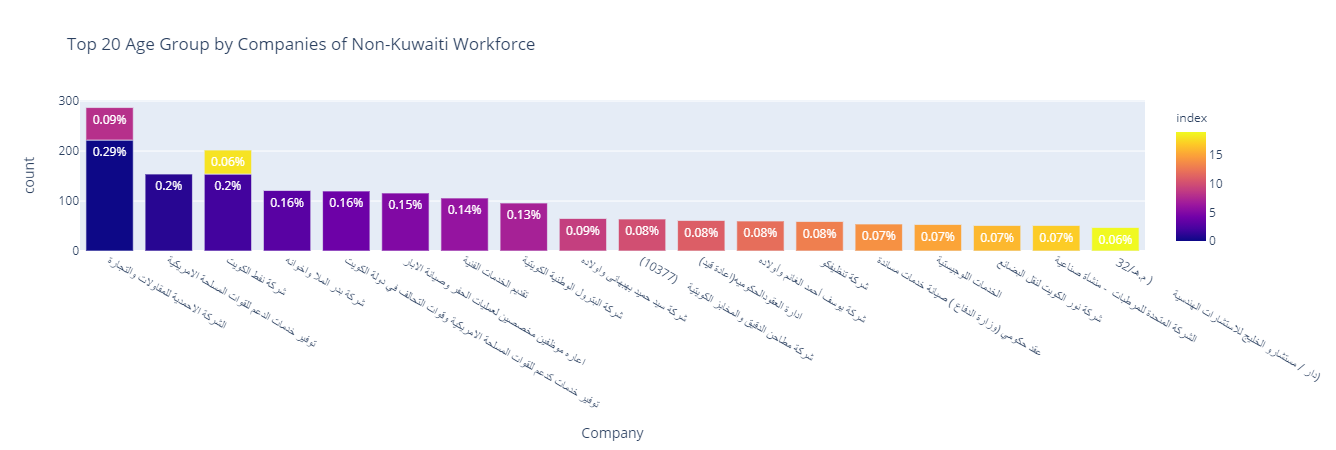

In [47]:
#hide_input

fig = px.bar(insight13,x="Company", y="count", color=insight13.index,barmode='group',text="Percentage",
             title = "Top 20 Age Group by Companies of Non-Kuwaiti Workforce")
fig.show()

## Insight 14 : Top 20 Nationalities by Educational Level of Non-Kuwaiti Workforce

In [48]:
#hide_input

data['COUNTER'] = 1
insight14 = data.groupby(['Nationality','Educational Level'])['COUNTER'].agg(['count'])
insight14['Percentage'] = ((insight14['count'] / 75528)*100).round(2) 
insight14['Percentage'] = insight14['Percentage'].astype(str) + '%'
insight14 = insight14.reset_index(['Nationality','Educational Level'])
insight14 = insight14.nlargest(20,'count')
insight14.reset_index(inplace=True,drop=True)

In [49]:
#hide_input

insight14.style.background_gradient(cmap='Reds')

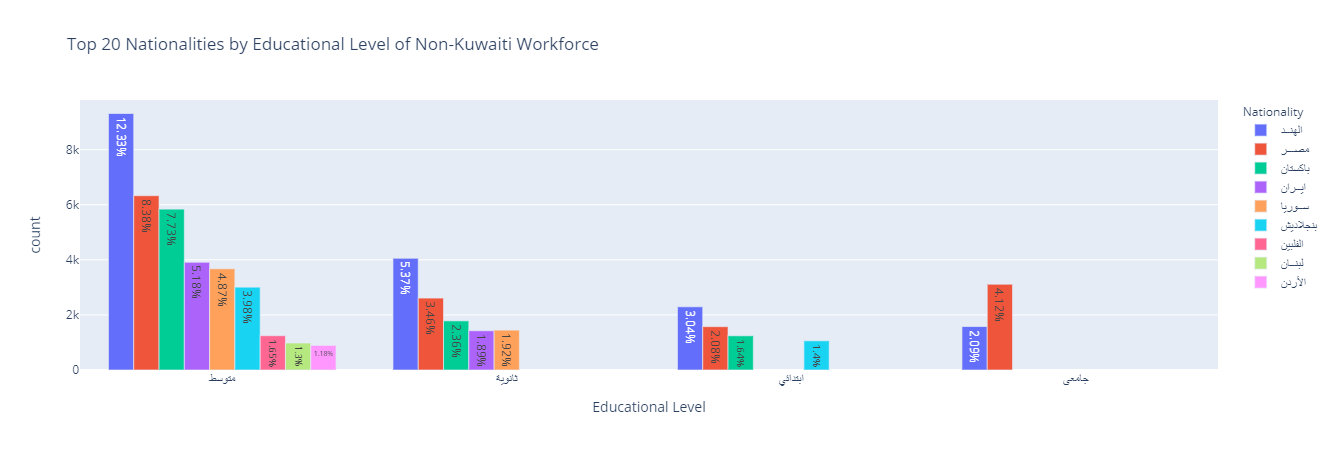

In [50]:
#hide_input

fig = px.bar(insight14,x="Educational Level", y="count", color="Nationality",barmode='group', text="Percentage",
             title = "Top 20 Nationalities by Educational Level of Non-Kuwaiti Workforce")
fig.show()

# Insight 15 : Top 10 Nationalities by Companies of Non-Kuwaiti Workforce

In [51]:
#hide_input

data['COUNTER'] = 1
insight15 = data.groupby(['Nationality','Company'])['COUNTER'].agg(['count'])
insight15['Percentage'] = ((insight15['count'] / 75528)*100).round(2) 
insight15['Percentage'] = insight15['Percentage'].astype(str) + '%'
insight15 = insight15.reset_index(['Nationality','Company'])
insight15 = insight15.nlargest(10,'count')
insight15.reset_index(inplace=True,drop=True)

In [52]:
#hide_input

insight15.style.background_gradient(cmap='Reds')

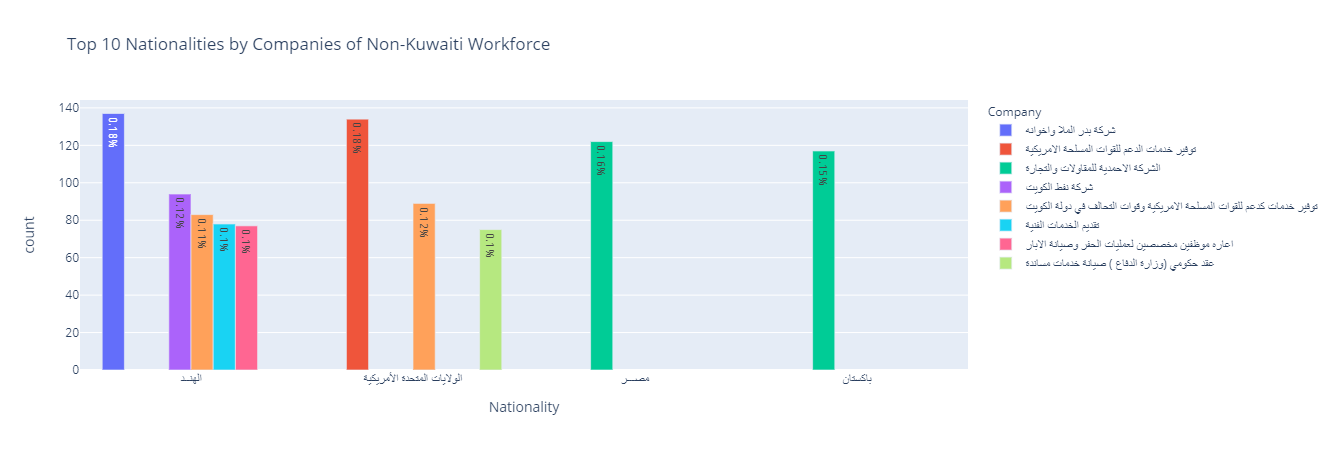

In [53]:
#hide_input

fig = px.bar(insight15,x="Nationality", y="count", color="Company",barmode='group',text = "Percentage",
             title = "Top 10 Nationalities by Companies of Non-Kuwaiti Workforce")
fig.show()

## Insight 16 - Top 20 Age Group by Occupation and Nationality of Non-Kuwaiti Workforce

In [54]:
#hide_input

insight16 = data.groupby(['Occupation', 'Nationality', 'Age Group']).size().unstack(level=2, fill_value=0)

In [55]:
#hide_input

insight16 = (insight16.stack().reset_index(name='Total Count').rename(columns={'level_2': 'Age Group'}))

In [56]:
#hide_input

pd.crosstab([insight16['Occupation'], insight16['Total Count']],[insight16['Age Group']],margins=True)

Age Group                       20-25   26-30   31-35   36-40   41-45   46-50  \
Occupation        Total Count                                                   
أخصائى / صحة عامة 0               120     120     120     120     120     120   
                  1                 0       0       0       0       0       0   
أخصائى أسنان      0               120     120     120     120     120     120   
                  1                 0       0       0       0       0       0   
أخصائى ألبان      0               120     120     120     120     120     120   
...                               ...     ...     ...     ...     ...     ...   
وكيل مدرسة        0               120     120     120     120     120     120   
                  1                 0       0       0       0       0       0   
                  2                 0       0       0       0       0       0   
                  3                 0       0       0       0       0       0   
All                            150480  150480  150480  150480  150480  150480   

Age Group                       51-55   56-60   61-65   66-70   71-75   76-80  \
Occupation        Total Count                                                   
أخصائى / صحة عامة 0               120     120     119     120     120     120   
                  1                 0       0       1       0       0       0   
أخصائى أسنان      0               120     120     120     119     120     119   
                  1                 0       0       0       1       0       1   
أخصائى ألبان      0               120     120     120     119     120     120   
...                               ...     ...     ...     ...     ...     ...   
وكيل مدرسة        0               120     120     118     118     117     117   
                  1                 0       0       2       1       3       2   
                  2                 0       0       0       0       0       1   
                  3                 0       0       0       1       0       0   
All                            150480  150480  150480  150480  150480  150480   

Age Group                       80-85   86-90  Above 90      All  
Occupation        Total Count                                     
أخصائى / صحة عامة 0               120     120       120     1799  
                  1                 0       0         0        1  
أخصائى أسنان      0               120     120       120     1798  
                  1                 0       0         0        2  
أخصائى ألبان      0               120     120       120     1799  
...                               ...     ...       ...      ...  
وكيل مدرسة        0               120     120       120     1790  
                  1                 0       0         0        8  
                  2                 0       0         0        1  
                  3                 0       0         0        1  
All                            150480  150480    150480  2257200  

[5534 rows x 16 columns]

In [57]:
#hide_input

insight16['Percentage'] = ((insight16['Total Count'] / 75528)*100).round(2)
insight16['Percentage'] = insight16['Percentage'].astype(str) + '%'
insight_16 = insight16.nlargest(20,'Total Count')

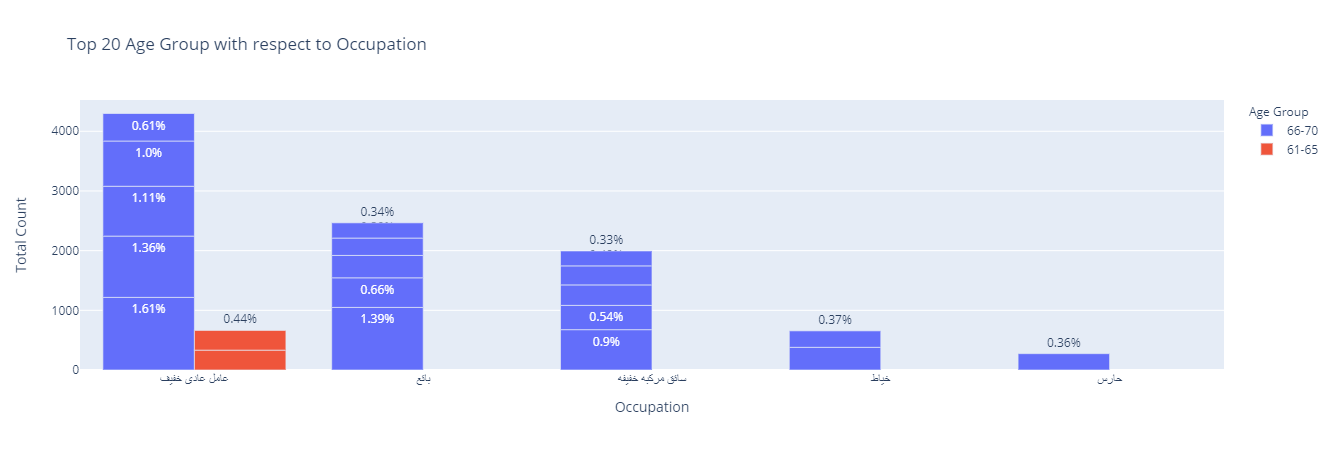

In [58]:
#hide_input

fig = px.bar(insight_16,x="Occupation", y="Total Count", color="Age Group",barmode='group',text="Percentage",
             title = "Top 20 Age Group with respect to Occupation")
fig.show()

In [59]:
#hide_input

insight_16.reset_index(inplace=True,drop=True)

In [60]:
#hide_input

insight_16.style.background_gradient(cmap='Reds')

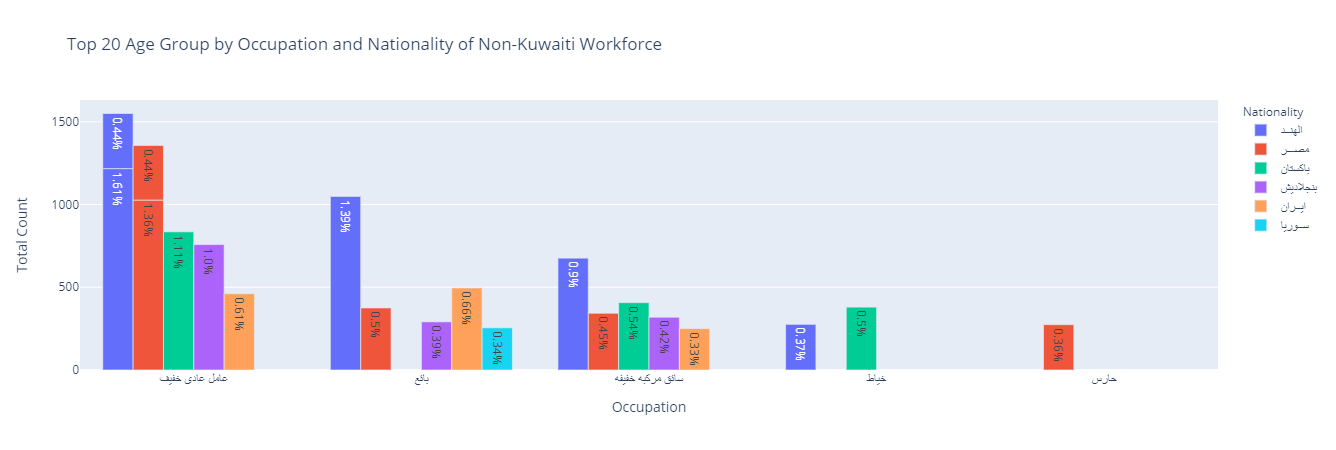

In [61]:
#hide_input

fig = px.bar(insight_16,x="Occupation", y="Total Count", color='Nationality',barmode='group',text="Percentage",
            hover_data = ['Age Group','Nationality','Occupation','Total Count','Percentage'], 
            title = "Top 20 Age Group by Occupation and Nationality of Non-Kuwaiti Workforce")

fig.show()

### Insight  17 - Top 20 Age Groups by Educational Level & Nationalities of Non-Kuwaiti Workforce

In [62]:
#hide_input

insight17 = data.groupby(['Educational Level', 'Nationality', 'Age Group']).size().unstack(level=2, fill_value=0)

In [63]:

#hide_input

insight17 = (insight17.stack().reset_index(name='Total Count').rename(columns={'level_2': 'Age Group'}))

In [64]:
#hide_input

insight17['Percentage'] = ((insight17['Total Count'] / 75528)*100).round(2)
insight17['Percentage'] = insight17['Percentage'].astype(str) + '%'
insight_17 = insight17.nlargest(20,'Total Count')

In [65]:
#hide_input

pd.crosstab([insight17['Educational Level'], insight17['Total Count']],[insight17['Age Group']],margins=True)

Age Group                      20-25  26-30  31-35  36-40  41-45  46-50  \
Educational Level Total Count                                             
ابتدائي           0              120    120    120    120    120    120   
                  1                0      0      0      0      0      0   
                  2                0      0      0      0      0      0   
                  3                0      0      0      0      0      0   
                  4                0      0      0      0      0      0   
...                              ...    ...    ...    ...    ...    ...   
متوسط             2122             0      0      0      0      0      0   
                  3719             0      0      0      0      0      0   
                  3761             0      0      0      0      0      0   
                  5872             0      0      0      0      0      0   
All                             1440   1440   1440   1440   1440   1440   

Age Group                      51-55  56-60  61-65  66-70  71-75  76-80  \
Educational Level Total Count                                             
ابتدائي           0              120    120     96     88     95    100   
                  1                0      0      6      7      8      3   
                  2                0      0      3      2      1      2   
                  3                0      0      1      2      2      1   
                  4                0      0      3      3      1      1   
...                              ...    ...    ...    ...    ...    ...   
متوسط             2122             0      0      0      1      0      0   
                  3719             0      0      0      1      0      0   
                  3761             0      0      0      1      0      0   
                  5872             0      0      0      1      0      0   
All                             1440   1440   1440   1440   1440   1440   

Age Group                      80-85  86-90  Above 90    All  
Educational Level Total Count                                 
ابتدائي           0              106    107       113   1665  
                  1                4      4         5     37  
                  2                2      4         1     15  
                  3                1      1         0      8  
                  4                0      1         0      9  
...                              ...    ...       ...    ...  
متوسط             2122             0      0         0      1  
                  3719             0      0         0      1  
                  3761             0      0         0      1  
                  5872             0      0         0      1  
All                             1440   1440      1440  21600  

[394 rows x 16 columns]

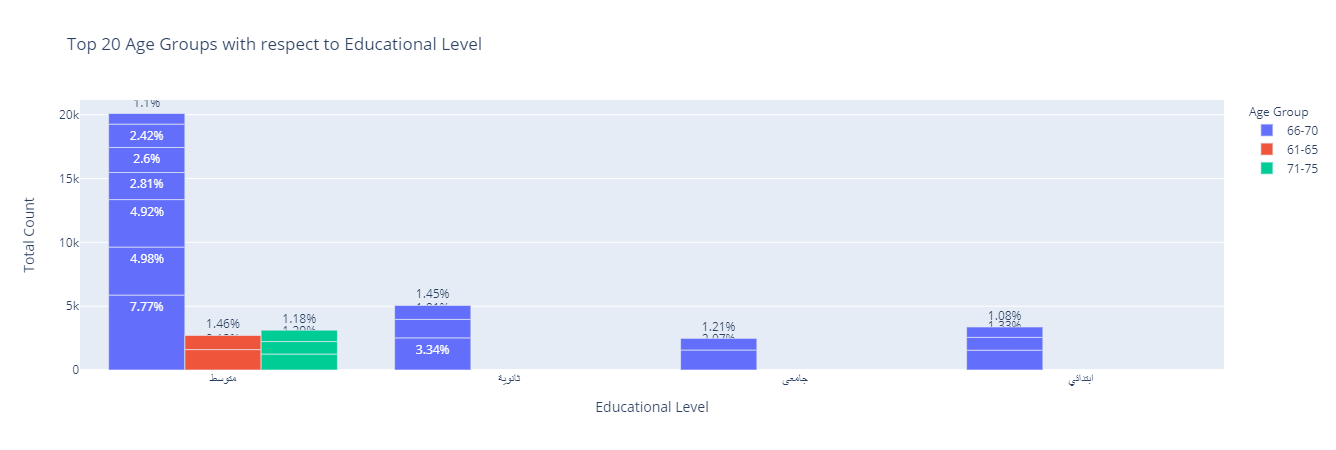

In [66]:
#hide_input

fig = px.bar(insight_17,x="Educational Level", y="Total Count", color="Age Group",barmode='group',text="Percentage",
             title = "Top 20 Age Groups with respect to Educational Level")
fig.show()

In [67]:
#hide_input

pd.crosstab([insight17['Nationality'], insight17['Total Count']],[insight17['Age Group']],margins=True)

Age Group                20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Nationality Total Count                                                    
أرتيريا     0               12     12     12     12     12     12     12   
            1                0      0      0      0      0      0      0   
            2                0      0      0      0      0      0      0   
            3                0      0      0      0      0      0      0   
            4                0      0      0      0      0      0      0   
...                        ...    ...    ...    ...    ...    ...    ...   
هولندا      5                0      0      0      0      0      0      0   
            11               0      0      0      0      0      0      0   
يوغسلفيا    0               12     12     12     12     12     12     12   
            1                0      0      0      0      0      0      0   
All                       1440   1440   1440   1440   1440   1440   1440   

Age Group                56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Nationality Total Count                                                    
أرتيريا     0               12     10      7      9      8     11     12   
            1                0      0      2      2      2      1      0   
            2                0      1      0      0      1      0      0   
            3                0      0      0      1      0      0      0   
            4                0      0      1      0      0      0      0   
...                        ...    ...    ...    ...    ...    ...    ...   
هولندا      5                0      0      1      0      0      0      0   
            11               0      0      1      0      0      0      0   
يوغسلفيا    0               12     11      9     12     11     12     12   
            1                0      1      3      0      1      0      0   
All                       1440   1440   1440   1440   1440   1440   1440   

Age Group                Above 90    All  
Nationality Total Count                   
أرتيريا     0                  12    165  
            1                   0      7  
            2                   0      2  
            3                   0      1  
            4                   0      1  
...                           ...    ...  
هولندا      5                   0      1  
            11                  0      1  
يوغسلفيا    0                  12    175  
            1                   0      5  
All                          1440  21600  

[862 rows x 16 columns]

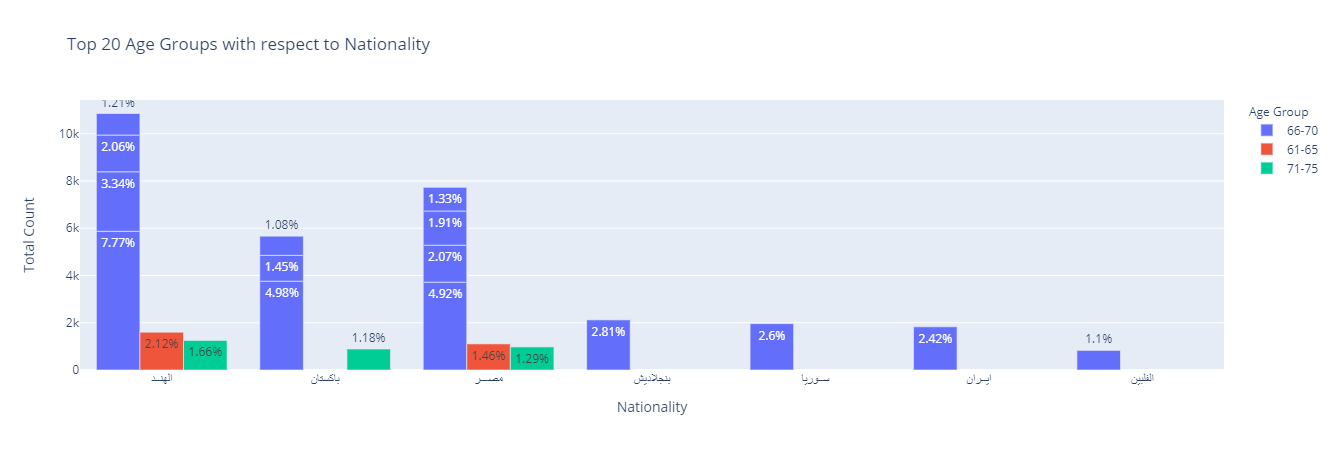

In [68]:
#hide_input

fig = px.bar(insight_17,x="Nationality", y="Total Count", color="Age Group",barmode='group',text="Percentage",
             title = "Top 20 Age Groups with respect to Nationality")
fig.show()

In [69]:
#hide_input

insight_17.reset_index(inplace=True,drop=True)


In [70]:

#hide_input

insight_17.style.background_gradient(cmap='Reds')

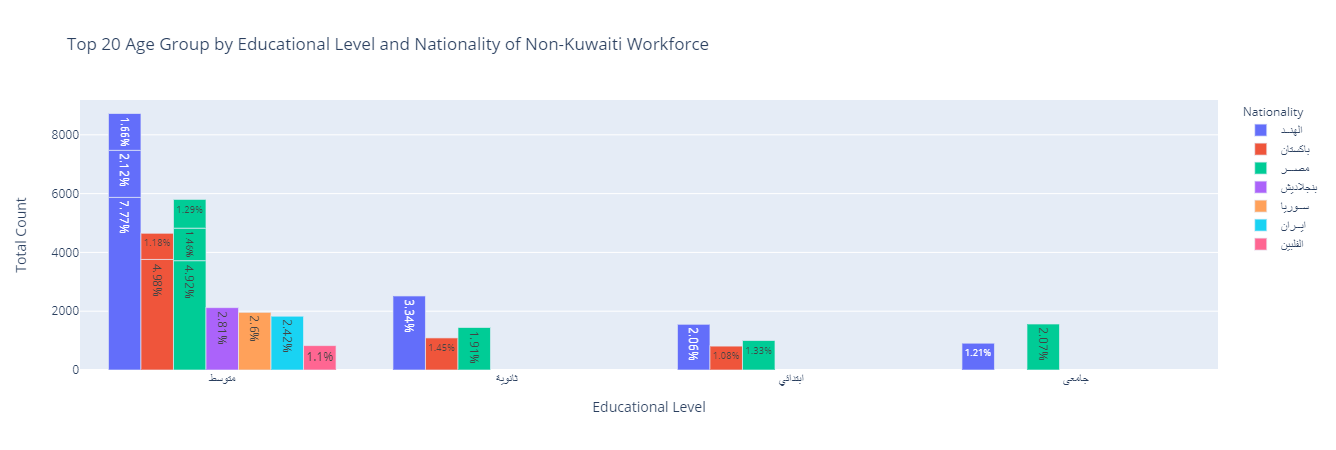

In [71]:
#hide_input

fig = px.bar(insight_17,x="Educational Level", y="Total Count", color='Nationality',barmode='group',text="Percentage",
hover_data = ['Age Group','Nationality','Educational Level','Total Count','Percentage'], 
             title = "Top 20 Age Group by Educational Level and Nationality of Non-Kuwaiti Workforce")
fig.show()

## Insight 18 - Top 20 Age Groups by Marital Status & Nationality of Non-Kuwaiti Workforce

In [72]:
#hide_input

insight18 = data.groupby(['Marital Status', 'Nationality', 'Age Group']).size().unstack(level=2, fill_value=0)

In [73]:
#hide_input

insight18 = (insight18.stack().reset_index(name='Total Count'))

In [74]:
#hide_input

insight18['Percentage'] = ((insight18['Total Count'] / 75528)*100).round(2)
insight18['Percentage'] = insight18['Percentage'].astype(str) + '%'
insight_18 = insight18.nlargest(20,'Total Count')

In [75]:
#hide_input

pd.crosstab([insight18['Marital Status'], insight18['Total Count']],[insight18['Age Group']],margins=True)

Age Group                   20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Marital Status Total Count                                                    
أرمل           0              120    120    120    120    120    120    120   
               1                0      0      0      0      0      0      0   
               2                0      0      0      0      0      0      0   
               3                0      0      0      0      0      0      0   
               4                0      0      0      0      0      0      0   
...                           ...    ...    ...    ...    ...    ...    ...   
مطلق           2                0      0      0      0      0      0      0   
               3                0      0      0      0      0      0      0   
               4                0      0      0      0      0      0      0   
               5                0      0      0      0      0      0      0   
All                           600    600    600    600    600    600    600   

Age Group                   56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Marital Status Total Count                                                    
أرمل           0              120    114    105    110    110    113    112   
               1                0      2      5      3      5      4      6   
               2                0      1      0      2      2      2      2   
               3                0      2      2      1      0      0      0   
               4                0      0      1      2      3      0      0   
...                           ...    ...    ...    ...    ...    ...    ...   
مطلق           2                0      2      4      4      2      0      0   
               3                0      0      3      0      0      0      0   
               4                0      1      1      0      1      0      0   
               5                0      0      0      1      0      0      0   
All                           600    600    600    600    600    600    600   

Age Group                   Above 90   All  
Marital Status Total Count                  
أرمل           0                 120  1744  
               1                   0    25  
               2                   0     9  
               3                   0     5  
               4                   0     6  
...                              ...   ...  
مطلق           2                   0    12  
               3                   0     3  
               4                   0     3  
               5                   0     1  
All                              600  9000  

[172 rows x 16 columns]

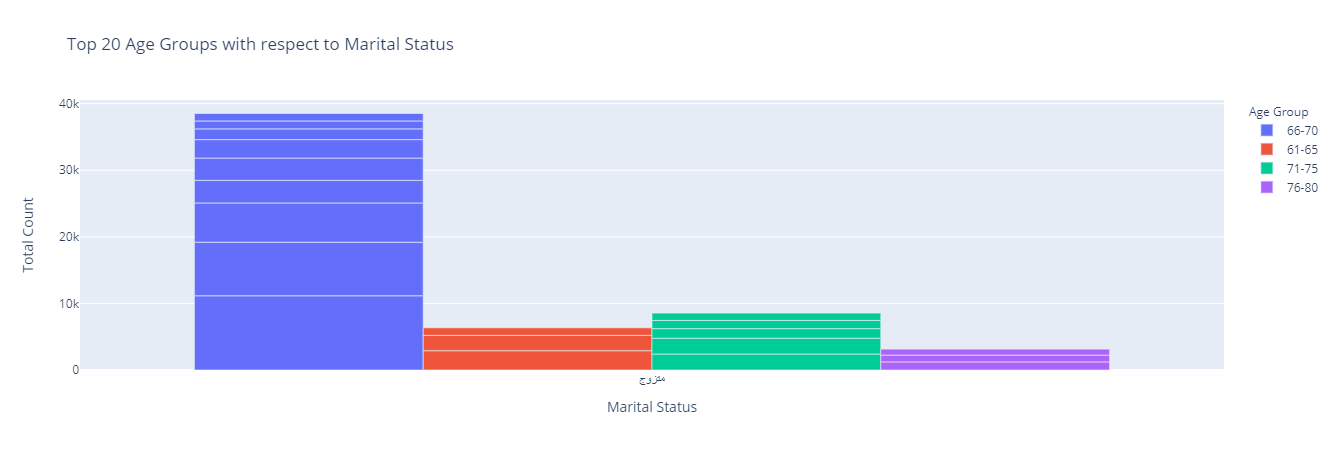

In [76]:
#hide_input

fig = px.bar(insight_18,x="Marital Status", y="Total Count", color="Age Group",barmode='group',
             title = "Top 20 Age Groups with respect to Marital Status")
#fig.updatetrace(textposition='outer')
fig.show()

In [77]:
#hide_input

pd.crosstab([insight18['Nationality'], insight18['Total Count']],[insight18['Age Group']],margins=True)

Age Group                20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Nationality Total Count                                                    
أرتيريا     0                5      5      5      5      5      5      5   
            1                0      0      0      0      0      0      0   
            5                0      0      0      0      0      0      0   
            6                0      0      0      0      0      0      0   
            15               0      0      0      0      0      0      0   
...                        ...    ...    ...    ...    ...    ...    ...   
هولندا      18               0      0      0      0      0      0      0   
يوغسلفيا    0                5      5      5      5      5      5      5   
            1                0      0      0      0      0      0      0   
            3                0      0      0      0      0      0      0   
All                        600    600    600    600    600    600    600   

Age Group                56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Nationality Total Count                                                    
أرتيريا     0                5      3      3      4      4      4      5   
            1                0      1      1      0      0      1      0   
            5                0      0      0      1      0      0      0   
            6                0      1      0      0      0      0      0   
            15               0      0      0      0      1      0      0   
...                        ...    ...    ...    ...    ...    ...    ...   
هولندا      18               0      0      1      0      0      0      0   
يوغسلفيا    0                5      4      4      5      4      5      5   
            1                0      1      0      0      1      0      0   
            3                0      0      1      0      0      0      0   
All                        600    600    600    600    600    600    600   

Age Group                Above 90   All  
Nationality Total Count                  
أرتيريا     0                   5    68  
            1                   0     3  
            5                   0     1  
            6                   0     1  
            15                  0     1  
...                           ...   ...  
هولندا      18                  0     1  
يوغسلفيا    0                   5    72  
            1                   0     2  
            3                   0     1  
All                           600  9000  

[592 rows x 16 columns]

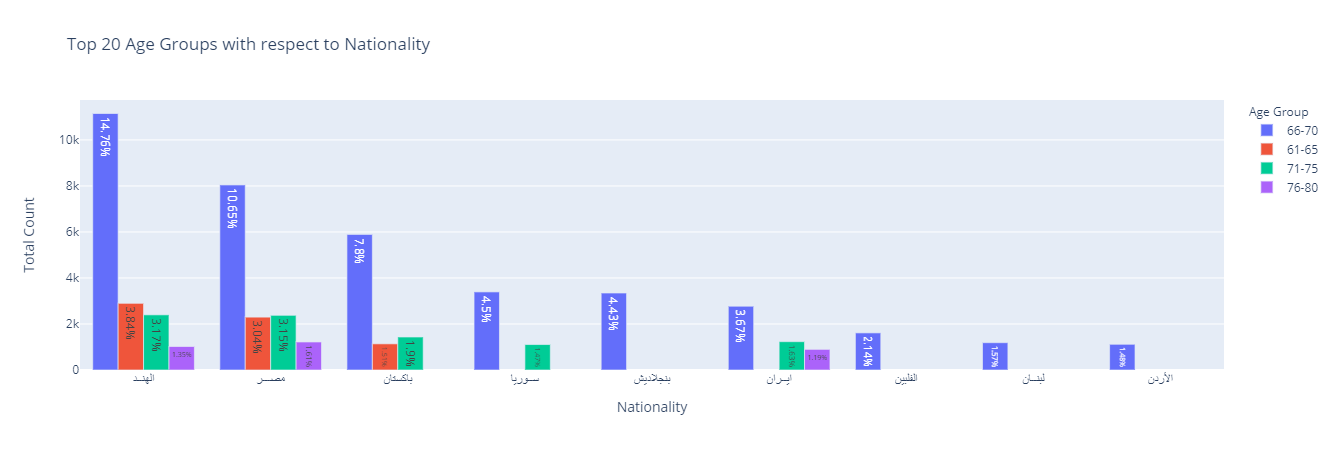

In [78]:
#hide_input

fig = px.bar(insight_18,x="Nationality", y="Total Count", color="Age Group",barmode='group',text="Percentage",
             title = "Top 20 Age Groups with respect to Nationality")
fig.show()

In [79]:
#hide_input

insight_18.reset_index(inplace=True,drop=True)

In [80]:
#hide_input

insight_18.style.background_gradient(cmap='Reds')

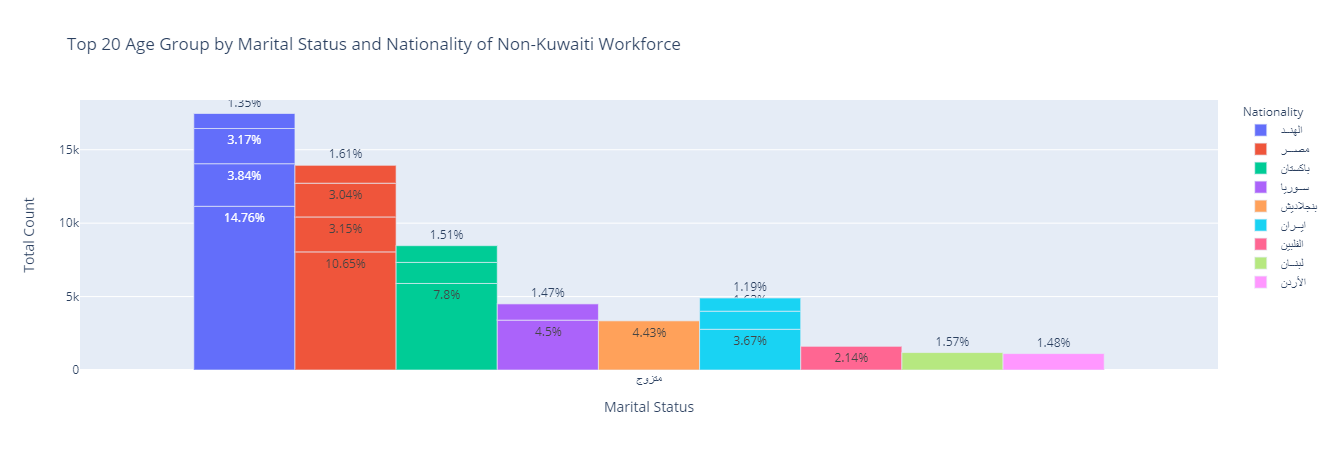

In [81]:
#hide_input

fig = px.bar(insight_18,x="Marital Status", y="Total Count", color='Nationality',barmode='group', text="Percentage",
            hover_data = ['Age Group','Nationality','Marital Status','Total Count','Percentage'], 
            title = "Top 20 Age Group by Marital Status and Nationality of Non-Kuwaiti Workforce")
fig.show()

### Insight 19 - Top 20 Occupations by Nationality, Educational Level of Non-Kuwaiti Workforce


In [82]:
#hide_input

insight19 = data.groupby(['Occupation', 'Nationality', 'Educational Level']).size().unstack(level=2, fill_value=0)

In [83]:
#hide_input

insight19 = (insight19.stack().reset_index(name='Total Count'))

In [84]:
#hide_input

insight19['Percentage'] = ((insight19['Total Count'] / 75528)*100).round(2)
insight19['Percentage'] = insight19['Percentage'].astype(str) + '%'
insight_19 = insight19.nlargest(20,'Total Count')

In [85]:
#hide_input

pd.crosstab([insight19['Occupation'], insight19['Total Count']],[insight19['Educational Level']],margins=True)

Educational Level              ابتدائي  ثانوية  جامعى  جامعي  خبرة وبدون مؤهل  \
Occupation        Total Count                                                   
أخصائى / صحة عامة 0                  1       1      0      1                1   
                  1                  0       0      1      0                0   
أخصائى أسنان      0                  2       2      0      2                2   
                  1                  0       0      2      0                0   
أخصائى ألبان      0                  1       0      1      1                1   
...                                ...     ...    ...    ...              ...   
وكيل مدرسة        0                  6       6      2      2                6   
                  1                  0       0      2      2                0   
                  2                  0       0      1      2                0   
                  3                  0       0      1      0                0   
All                               6987    6987   6987   6987             6987   

Educational Level              دبلوم  دبلوم دراسات عليا سنة بعد الجامعى  \
Occupation        Total Count                                             
أخصائى / صحة عامة 0                1                                  1   
                  1                0                                  0   
أخصائى أسنان      0                2                                  2   
                  1                0                                  0   
أخصائى ألبان      0                1                                  1   
...                              ...                                ...   
وكيل مدرسة        0                6                                  6   
                  1                0                                  0   
                  2                0                                  0   
                  3                0                                  0   
All                             6987                               6987   

Educational Level              دبلوم دراسات عليا سنتان بعد الجامعى  دكتوراه  \
Occupation        Total Count                                                 
أخصائى / صحة عامة 0                                              1        1   
                  1                                              0        0   
أخصائى أسنان      0                                              2        2   
                  1                                              0        0   
أخصائى ألبان      0                                              1        1   
...                                                            ...      ...   
وكيل مدرسة        0                                              6        6   
                  1                                              0        0   
                  2                                              0        0   
                  3                                              0        0   
All                                                           6987     6987   

Educational Level              غير معرف  ماجستير  متوسط    All  
Occupation        Total Count                                   
أخصائى / صحة عامة 0                   1        1      1     11  
                  1                   0        0      0      1  
أخصائى أسنان      0                   2        2      2     22  
                  1                   0        0      0      2  
أخصائى ألبان      0                   1        1      1     11  
...                                 ...      ...    ...    ...  
وكيل مدرسة        0                   6        6      6     64  
                  1                   0        0      0      4  
                  2                   0        0      0      3  
                  3                   0        0      0      1  
All                                6987     6987   6987  83844  

[5553 rows x 13 columns]

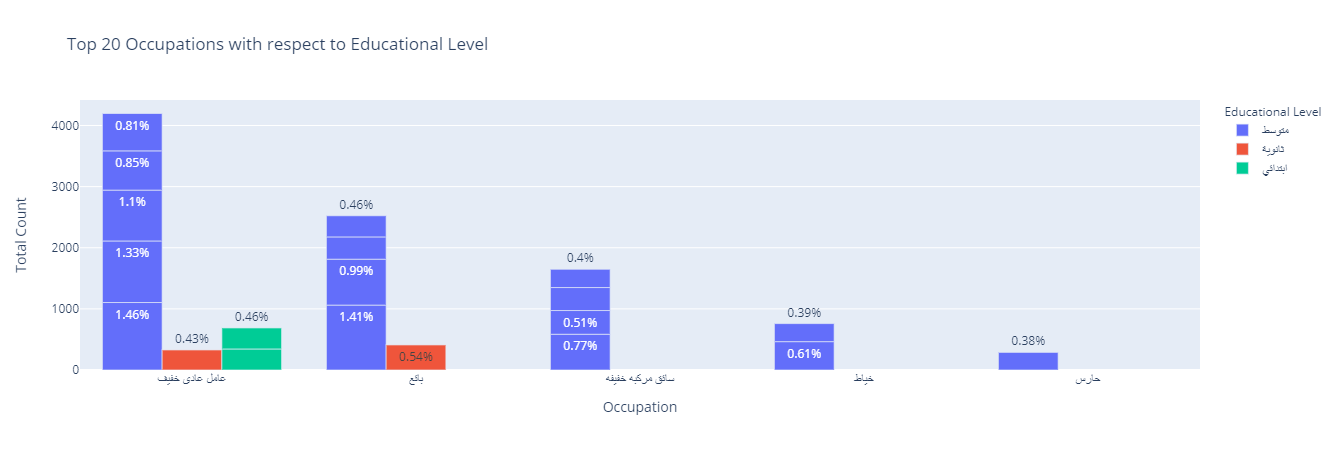

In [86]:
#hide_input

fig = px.bar(insight_19,x="Occupation", y="Total Count", color="Educational Level",barmode='group',text="Percentage",
             title = "Top 20 Occupations with respect to Educational Level")
fig.show()

In [87]:
#hide_input

pd.crosstab([insight19['Nationality'], insight19['Total Count']],[insight19['Educational Level']],margins=True)

Educational Level        ابتدائي  ثانوية  جامعى  جامعي  خبرة وبدون مؤهل  \
Nationality Total Count                                                   
أرتيريا     0                 30      27     33     35               35   
            1                  3       6      2      0                0   
            2                  2       2      0      0                0   
            3                  0       0      0      0                0   
اثيوبيا     0                 14      10     15     15               15   
...                          ...     ...    ...    ...              ...   
هولندا      5                  0       1      0      0                0   
يوغسلفيا    0                  4       3      2      3                4   
            1                  0       1      2      0                0   
            2                  0       0      0      1                0   
All                         6987    6987   6987   6987             6987   

Educational Level        دبلوم  دبلوم دراسات عليا سنة بعد الجامعى  \
Nationality Total Count                                             
أرتيريا     0               34                                 35   
            1                1                                  0   
            2                0                                  0   
            3                0                                  0   
اثيوبيا     0               15                                 15   
...                        ...                                ...   
هولندا      5                0                                  0   
يوغسلفيا    0                4                                  4   
            1                0                                  0   
            2                0                                  0   
All                       6987                               6987   

Educational Level        دبلوم دراسات عليا سنتان بعد الجامعى  دكتوراه  \
Nationality Total Count                                                 
أرتيريا     0                                             35       35   
            1                                              0        0   
            2                                              0        0   
            3                                              0        0   
اثيوبيا     0                                             15       15   
...                                                      ...      ...   
هولندا      5                                              0        0   
يوغسلفيا    0                                              4        4   
            1                                              0        0   
            2                                              0        0   
All                                                     6987     6987   

Educational Level        غير معرف  ماجستير  متوسط    All  
Nationality Total Count                                   
أرتيريا     0                  35       35      6    375  
            1                   0        0     22     34  
            2                   0        0      5      9  
            3                   0        0      2      2  
اثيوبيا     0                  14       15      4    162  
...                           ...      ...    ...    ...  
هولندا      5                   0        0      0      1  
يوغسلفيا    0                   4        4      4     44  
            1                   0        0      0      3  
            2                   0        0      0      1  
All                          6987     6987   6987  83844  

[985 rows x 13 columns]

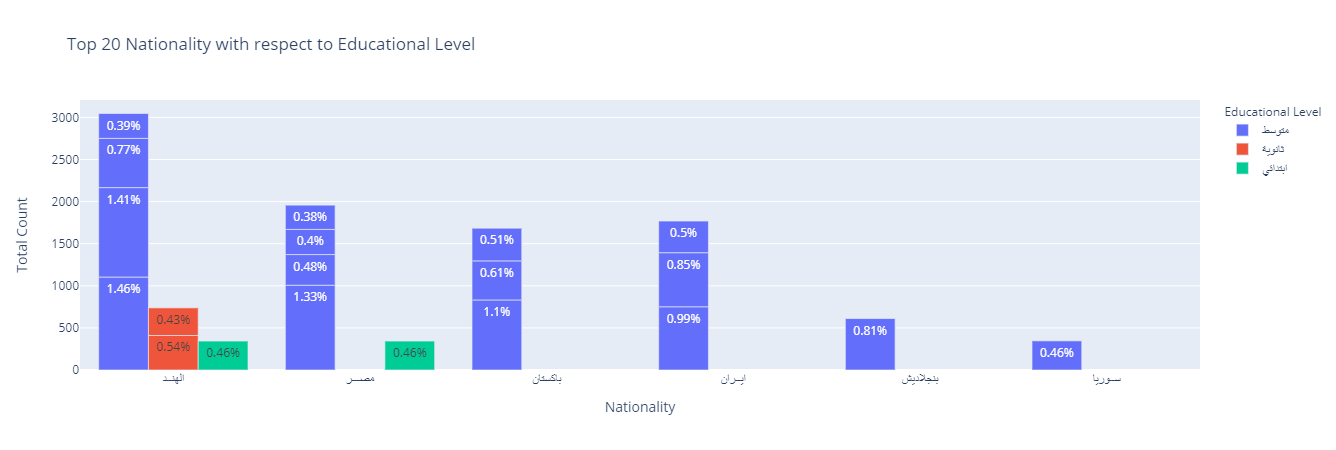

In [88]:
#hide_input

fig = px.bar(insight_19,x="Nationality", y="Total Count", color="Educational Level",barmode='group',text="Percentage",
             title = "Top 20 Nationality with respect to Educational Level")
fig.show()

In [89]:
#hide_input

insight_19.reset_index(inplace=True,drop=True)

In [90]:
#hide_input

insight_19.style.background_gradient(cmap='Reds')

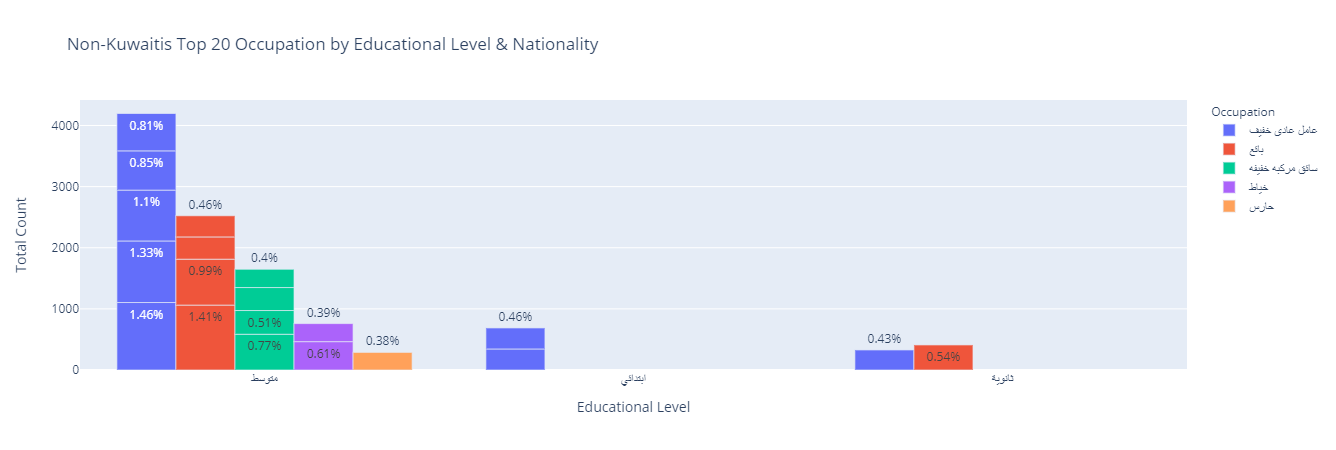

In [91]:
#hide_input

fig = px.bar(insight_19,x="Educational Level", y="Total Count", hover_data = insight19.columns,color="Occupation",
             barmode='group',text="Percentage",title = "Non-Kuwaitis Top 20 Occupation by Educational Level & Nationality")
fig.show()

### Insight 20 - Occupations by all other Nationalities, Age Group

In [92]:
#hide_input

insight20 = data.groupby(['Occupation','Age Group']).size().unstack(level=1, fill_value=0)

In [93]:
#hide_input

insight20  = (insight20.stack().reset_index(name='Total Count'))

In [94]:
#hide_input

insight20['Percentage'] = ((insight20['Total Count'] / 75528)*100).round(2)
insight20['Percentage'] = insight20['Percentage'].astype(str) + '%'
insight_20 = insight20.nlargest(20,'Total Count')

In [95]:
#hide_input

pd.crosstab([insight20['Occupation'], insight20['Total Count']],[insight20['Age Group']],margins=True)

Age Group                      20-25  26-30  31-35  36-40  41-45  46-50  \
Occupation        Total Count                                             
أخصائى / صحة عامة 0                1      1      1      1      1      1   
                  1                0      0      0      0      0      0   
أخصائى أسنان      0                1      1      1      1      1      1   
                  1                0      0      0      0      0      0   
أخصائى ألبان      0                1      1      1      1      1      1   
...                              ...    ...    ...    ...    ...    ...   
وكيل مدرسة        0                1      1      1      1      1      1   
                  2                0      0      0      0      0      0   
                  3                0      0      0      0      0      0   
                  4                0      0      0      0      0      0   
All                             1254   1254   1254   1254   1254   1254   

Age Group                      51-55  56-60  61-65  66-70  71-75  76-80  \
Occupation        Total Count                                             
أخصائى / صحة عامة 0                1      1      0      1      1      1   
                  1                0      0      1      0      0      0   
أخصائى أسنان      0                1      1      1      0      1      0   
                  1                0      0      0      1      0      1   
أخصائى ألبان      0                1      1      1      0      1      1   
...                              ...    ...    ...    ...    ...    ...   
وكيل مدرسة        0                1      1      0      0      0      0   
                  2                0      0      1      0      0      0   
                  3                0      0      0      0      1      0   
                  4                0      0      0      1      0      1   
All                             1254   1254   1254   1254   1254   1254   

Age Group                      80-85  86-90  Above 90    All  
Occupation        Total Count                                 
أخصائى / صحة عامة 0                1      1         1     14  
                  1                0      0         0      1  
أخصائى أسنان      0                1      1         1     13  
                  1                0      0         0      2  
أخصائى ألبان      0                1      1         1     14  
...                              ...    ...       ...    ...  
وكيل مدرسة        0                1      1         1     11  
                  2                0      0         0      1  
                  3                0      0         0      1  
                  4                0      0         0      2  
All                             1254   1254      1254  18810  

[4329 rows x 16 columns]

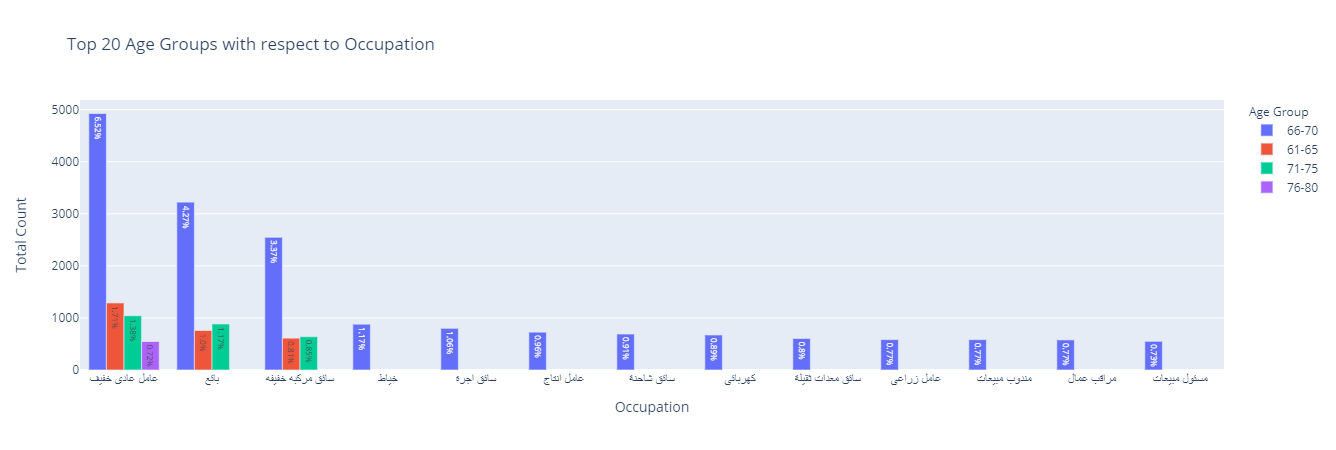

In [96]:
#hide_input

fig = px.bar(insight_20,x="Occupation", y="Total Count", color="Age Group",barmode='group',text="Percentage",
             title = "Top 20 Age Groups with respect to Occupation")
fig.show()

In [97]:
#hide_input

insight_20.reset_index(inplace=True,drop=True)

In [98]:
#hide_input

insight_20.style.background_gradient(cmap='Reds')

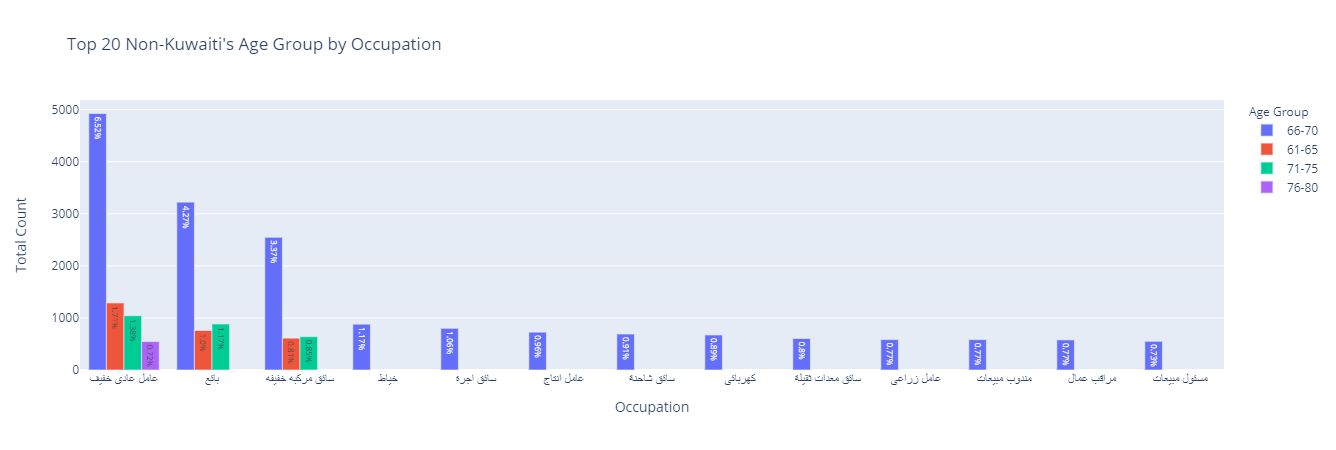

In [99]:
#hide_input

fig = px.bar(insight_20,x="Occupation", y="Total Count", hover_data = insight_20.columns, text="Percentage",color ="Age Group",
             barmode='group',title = "Top 20 Non-Kuwaiti's Age Group by Occupation")
fig.show()

### INSIGHT 21 - Top 20 Occupations by Non-Kuwaiti Nationalities according to Marital status

In [100]:
#hide_input

data['COUNTER'] = 1
insight21 = data.groupby(["Occupation","Nationality","Marital Status"])['COUNTER'].agg(['count'])
insight21['Percentage'] = ((insight21['count'] / 75528)*100).round(2) 
insight21['Percentage'] = insight21['Percentage'].astype(str) + '%'
insight21 = insight21.reset_index(["Occupation","Nationality","Marital Status"])

In [101]:
#hide_input

pd.crosstab([insight21['Occupation'], insight21['count']],[insight21['Marital Status']],margins=True)

Marital Status           أرمل  أعزب  غير معرف  متزوج  مطلق   All
Occupation        count                                         
أخصائى / صحة عامة 1         0     0         0      1     0     1
أخصائى أسنان      1         0     0         0      2     0     2
أخصائى ألبان      1         0     0         0      1     0     1
أخصائى اجتماعى    1         0     1         0      7     0     8
                  5         0     0         0      1     0     1
...                       ...   ...       ...    ...   ...   ...
وكيل محامى        1         0     0         0      2     0     2
وكيل مدرسة        1         0     2         0      1     0     3
                  2         0     0         0      3     0     3
                  4         0     0         0      1     0     1
All                       131   783        36   6883    69  7902

[3993 rows x 6 columns]

In [102]:
#hide_input

insight21 = insight21.nlargest(20,'count')
insight21.reset_index(inplace=True,drop=True)

In [103]:
#hide_input

insight21.style.background_gradient(cmap='Reds')

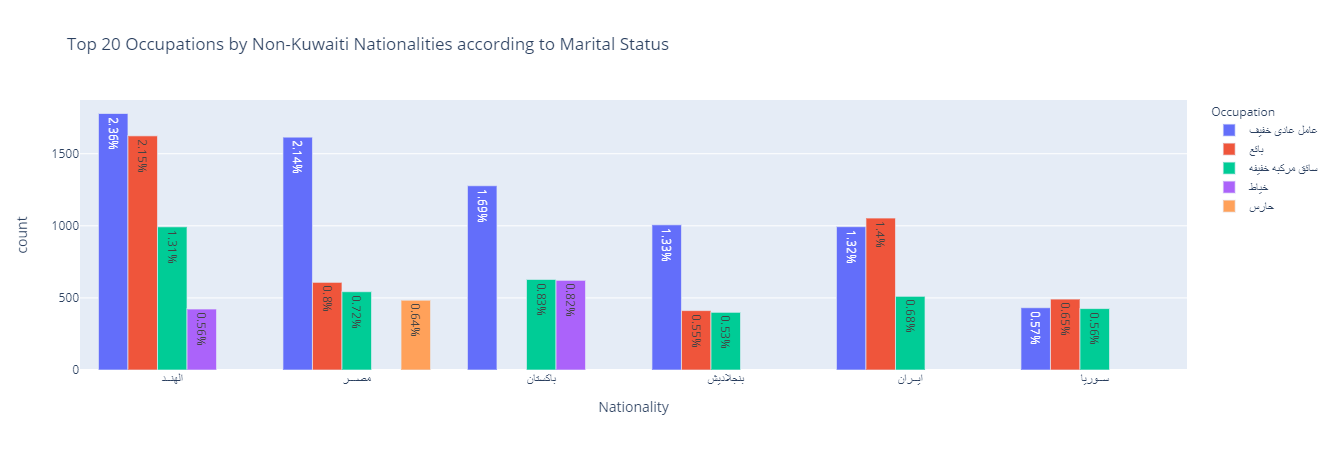

In [104]:
#hide_input

fig = px.bar(insight21,x="Nationality", y="count", hover_data = insight21.columns,color="Occupation",text="Percentage",
            barmode='group',title = "Top 20 Occupations by Non-Kuwaiti Nationalities according to Marital Status")
fig.show()

### Insight 22 :  Total work force by Different Parameters

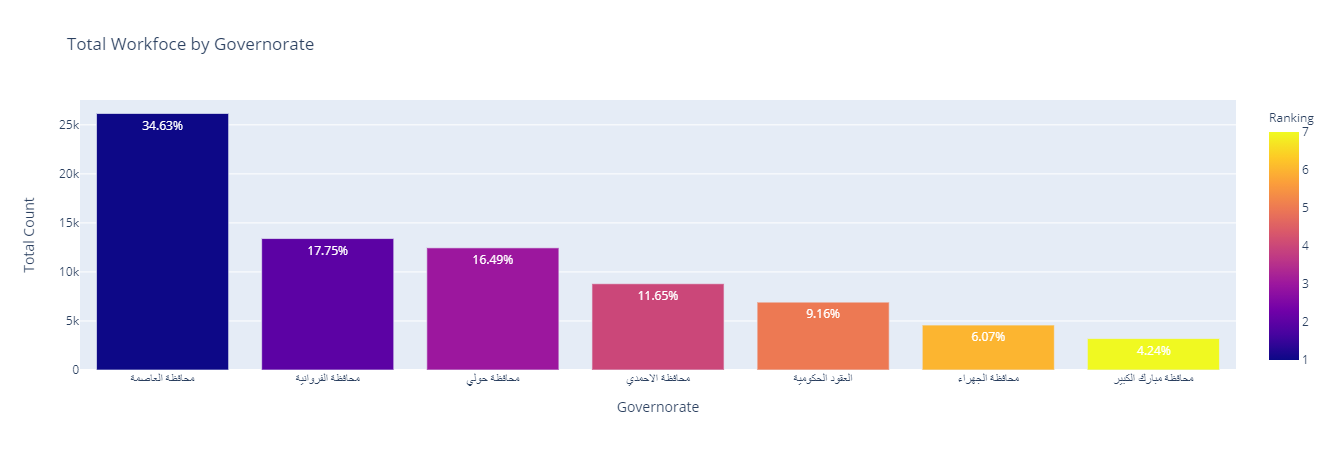

In [105]:
#hide_input

f = dict(data['Governorate'].value_counts())
insight23 = pd.DataFrame()
f = dict(sorted(f.items(), key=operator.itemgetter(1), reverse=True)[:7])
insight23['Governorate'] = f.keys()
insight23['Total Count'] = f.values()
insight23['Ranking'] = insight23.index+1
insight23['Percentage'] = ((insight23['Total Count'] / 75528)*100).round(2)
insight23['Percentage'] = insight23['Percentage'].astype(str) + '%'
fig = px.bar(insight23,x="Governorate",y="Total Count",color="Ranking",text="Percentage",title = "Total Workfoce by Governorate")
fig.show()

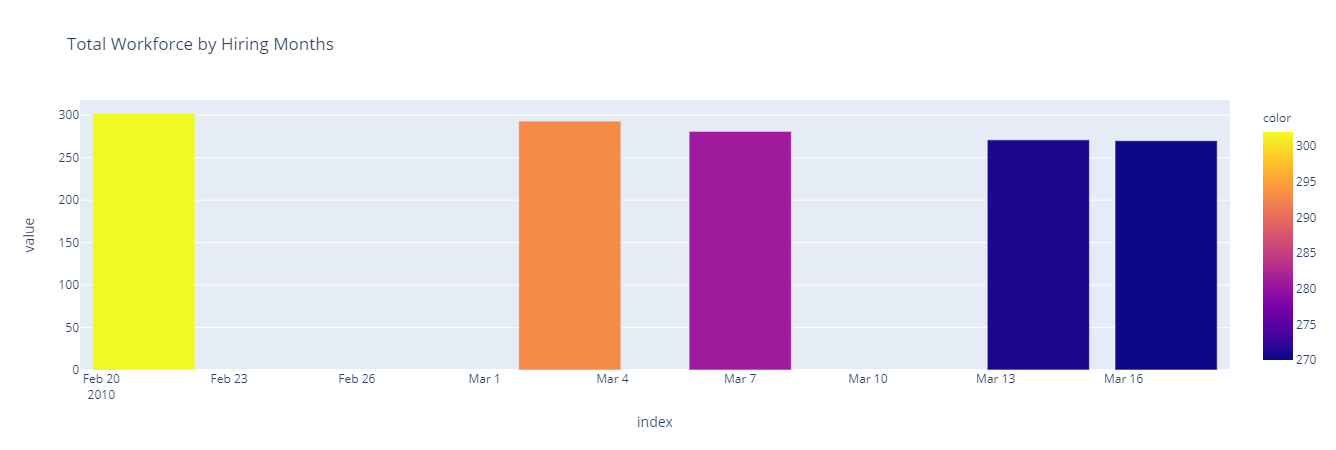

In [106]:
#hide_input

top_5_HIRE_DATE = data['Hire Date'].value_counts().head(5)
fig9 = px.bar(top_5_HIRE_DATE, title = 'Total Workforce by Hiring Months',color=top_5_HIRE_DATE)
fig9.show()

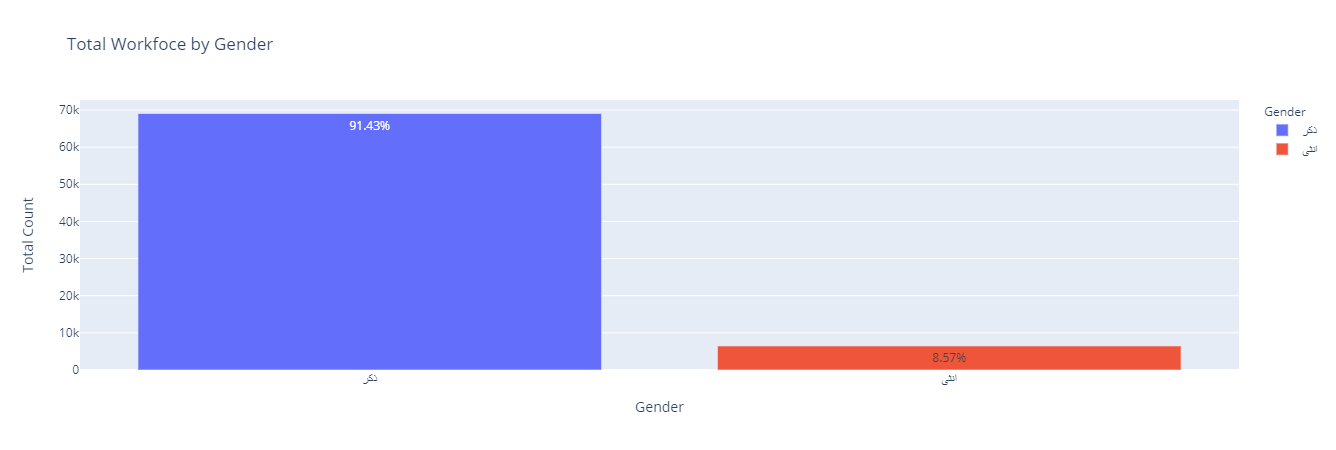

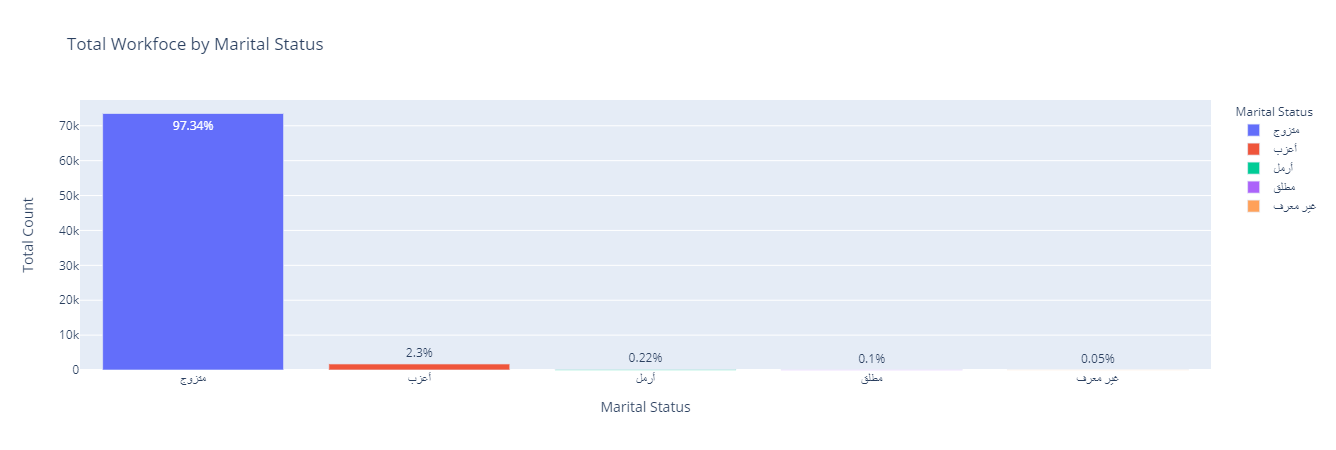

In [107]:
#hide_input

l = dict(data['Gender'].value_counts())
insight20 = pd.DataFrame()
l = dict(sorted(l.items(), key=operator.itemgetter(1), reverse=True)[:2])
insight20['Gender'] = l.keys()
insight20['Total Count'] = l.values()
insight20['Percentage'] = ((insight20['Total Count'] / 75528)*100).round(2)
insight20['Percentage'] = insight20['Percentage'].astype(str) + '%'
fig21 = px.bar(insight20,x="Gender",y="Total Count",color="Gender",text="Percentage",title = "Total Workfoce by Gender")
fig21.show()


g = dict(data['Marital Status'].value_counts())
insight16 = pd.DataFrame()
g = dict(sorted(g.items(), key=operator.itemgetter(1), reverse=True)[:6])
insight16['Marital Status'] = g.keys()
#insight16['Marital Status'] = insight16['Marital Status'].replace(r'^\s*$', " -- ", regex=True)
insight16['Total Count'] = g.values()
insight16['Percentage'] = ((insight16['Total Count'] / 75528)*100).round(2)
insight16['Percentage'] = insight16['Percentage'].astype(str) + '%'
fig7 = px.bar(insight16,x="Marital Status",y="Total Count",color="Marital Status",text="Percentage",title = "Total Workfoce by Marital Status")
fig7.show()

### Insight 23 : What are the Occupations that are held by Non-Kuwaitis with age of 60 or above that can be replaced by Kuwaitis

In [108]:
#hide_input

data['COUNTER'] = 1
insight23= data.groupby(["Category","Occupation","Educational Level","Age"])['COUNTER'].agg(['count'])
insight23['Percentage'] = ((insight23['count'] / 75528)*100).round(2) 
insight23['Percentage'] = insight23['Percentage'].astype(str) + '%'
insight23 = insight23.reset_index(["Category","Occupation","Educational Level","Age"])

In [109]:
#hide_input

df1['COUNTER'] = 1
insight_23 = df1.groupby(["Category","Occupation","Educational Level","Age"])['COUNTER'].agg(['count'])
insight_23['Percentage'] = ((insight_23['count'] / 75528)*100).round(2) 
insight_23['Percentage'] = insight_23['Percentage'].astype(str) + '%'
insight_23 = insight_23.reset_index(["Category","Occupation","Educational Level","Age"])

In [110]:
#hide_input

x = insight23[(insight23['Occupation'].isin(insight_23['Occupation']))] 
y = insight23[(insight23['Educational Level'].isin(insight_23['Educational Level']))] 


In [111]:
#hide_input

rslt_df = x.merge(y, how = 'inner' ,indicator=False)

In [112]:
#hide_input

rslt_df['Percentage'] = ((rslt_df['count'] / 75528)*100).round(2)


In [113]:
#hide_input

rslt_df['Percentage'] = rslt_df['Percentage'].astype(str) + '%'
rslt_df1 = rslt_df.nlargest(20,'count')

In [114]:
#hide_input


pd.crosstab([rslt_df['Occupation'], rslt_df['count']],[rslt_df['Age']],margins=True)

Age                      60.0  61.0  62.0  63.0  64.0  65.0  66.0  67.0  68.0  \
Occupation        count                                                         
أخصائى ادارى      1         0     0     0     1     0     0     0     0     0   
أخصائى تجميل      1         0     1     0     1     0     0     0     0     0   
                  2         1     1     1     0     0     0     0     0     0   
أخصائى فنى / علمى 1         1     0     0     0     0     0     0     0     0   
أخصائى نفسى       1         1     0     0     0     0     0     0     0     0   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
نائب مدير         1         0     0     0     1     0     0     0     0     0   
                  2         0     0     0     0     1     0     0     0     0   
                  3         0     0     0     0     0     0     1     0     0   
نائب مدير عام     1         1     0     1     0     0     0     0     0     0   
All                       221   221   211   188   193   191   162   163   141   

Age                      69.0  ...  89.0  90.0  91.0  92.0  93.0  94.0  95.0  \
Occupation        count        ...                                             
أخصائى ادارى      1         0  ...     0     0     0     0     0     0     0   
أخصائى تجميل      1         0  ...     0     0     0     0     0     0     0   
                  2         0  ...     0     0     0     0     0     0     0   
أخصائى فنى / علمى 1         0  ...     0     0     0     0     0     0     0   
أخصائى نفسى       1         0  ...     0     0     0     0     0     0     0   
...                       ...  ...   ...   ...   ...   ...   ...   ...   ...   
نائب مدير         1         0  ...     0     0     0     0     0     0     0   
                  2         0  ...     0     0     0     0     0     0     0   
                  3         0  ...     0     0     0     0     0     0     0   
نائب مدير عام     1         0  ...     0     0     0     0     0     0     0   
All                       133  ...     7     8     8     3     2     2     1   

Age                      96.0  98.0   All  
Occupation        count                    
أخصائى ادارى      1         0     0     2  
أخصائى تجميل      1         0     0     4  
                  2         0     0     3  
أخصائى فنى / علمى 1         0     0     1  
أخصائى نفسى       1         0     0     1  
...                       ...   ...   ...  
نائب مدير         1         0     0     4  
                  2         0     0     1  
                  3         0     0     1  
نائب مدير عام     1         0     0     3  
All                         1     1  2905  

[1053 rows x 39 columns]

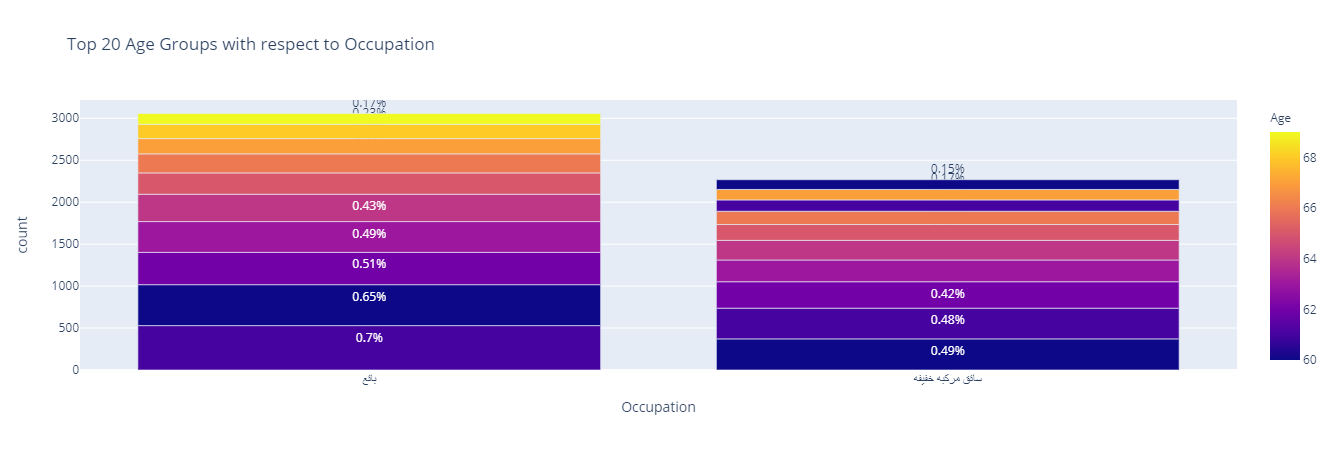

In [115]:
#hide_input

fig = px.bar(rslt_df1,x="Occupation", y="count", color="Age",barmode='group',text="Percentage",
             title = "Top 20 Age Groups with respect to Occupation")
fig.show()

In [116]:
#hide_input

rslt_df1.reset_index(inplace=True,drop=True)

In [117]:
#hide_input

rslt_df1.style.background_gradient(cmap='Reds')

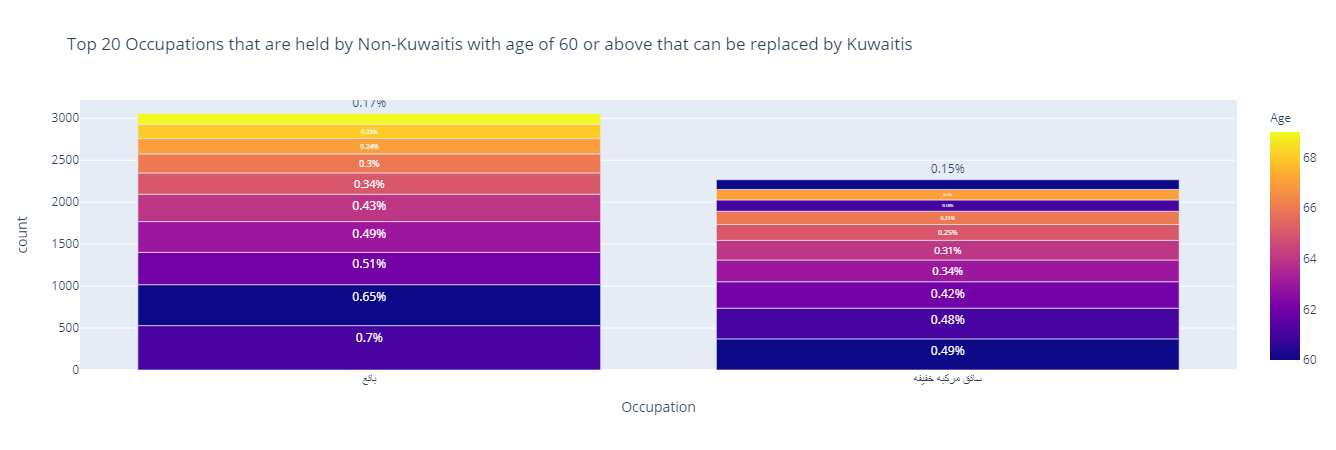

In [118]:
#hide_input

fig = px.bar(rslt_df1,x="Occupation", y="count", hover_data = rslt_df1.columns, color="Age",
            text = "Percentage",title = "Top 20 Occupations that are held by Non-Kuwaitis with age of 60 or above that can be replaced by Kuwaitis")
fig.show()

In [119]:
#hide_input 

a = rslt_df['Occupation'].unique()
print("\nOccupations that are held by Non-Kuwaitis with age of 60 or above that can be replaced by Kuwaitis :  ",len(a))
a[0:182]


Occupations that are held by Non-Kuwaitis with age of 60 or above that can be replaced by Kuwaitis :   182


array(['أخصائى ادارى', 'أخصائى تجميل', 'أخصائى فنى / علمى', 'أخصائى نفسى',
       'أمين خزينة', 'أمين صندوق', 'أمين مخزن', 'بائع', 'بائع سيارات',
       'باحث قانونى', 'بحار', 'حارس', 'حارس أمن', 'حاسب كميات',
       'رئيس عمال', 'رئيس قسم', 'سائق شاحنة', 'سائق مركبه خفيفه',
       'سكرتير', 'سكرتير إدارى', 'سكرتير تنفيذى', 'صراف خزينة', 'صيدلى',
       'ضابط أمن', 'ضابط اتصال /ضابط اداري', 'طبيب', 'طبيب / عام',
       'طبيب بشرى', 'فنى', 'فنى أتصالات', 'فنى أجهزة دقيقة',
       'فنى الكترونيات', 'فنى انتاج', 'فنى تليفونات', 'فنى ديكور',
       'فنى صيانة', 'فنى كمبيوتر', 'فنى مختبر', 'فنى ميكانيك', 'كاتب',
       'كاتب ادارى', 'كاتب حسابات', 'كاتب دوام', 'كاتب سجلات',
       'كاتب مشتريات', 'كاشير', 'كبير مهندسين', 'كهربائى',
       'كهربائى سيارات', 'كهربائى معدات', 'مأمور بدالة', 'مبرمج كمبيوتر',
       'محرر', 'محصل', 'مخلص معاملات', 'مدخل بيانات', 'مدرس',
       'مدرس لغة انجليزية', 'مدرس مواد عامة', 'مدقق حسابات', 'مدير',
       'مدير ادارة', 'مدير ادارى', 'مدير الشئون الادارية',

### Insight 24: What/Who are the Employers Those who hire most of the Non-Kuwaitis and can be replaced by Kuwaitis

In [120]:
#hide_input

insight24 = data.groupby(['Company','Category','Age Group']).size().unstack(level=2, fill_value=0)

In [121]:
#hide_input

insight24 = (insight24.stack().reset_index(name='Total Count'))

In [122]:
#hide_input

insight24['Percentage'] = ((insight24['Total Count'] / 75528)*100).round(2) 
insight24['Percentage'] = insight24['Percentage'].astype(str) + '%'

In [123]:
#hide_input

rslt = insight24[insight24['Company'].isin(df1['Company'])]

rslt1 = rslt.nlargest(10,'Total Count')
rslt1.reset_index(inplace=True,drop=True)

In [124]:

#hide_input

rslt1.style.background_gradient(cmap='Reds')

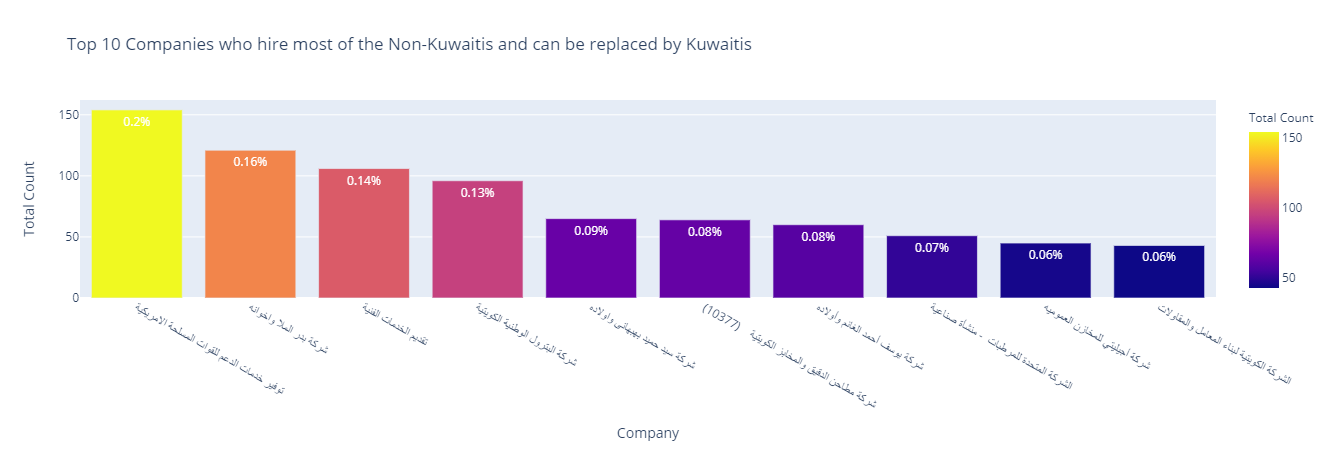

In [125]:
#hide_input

fig = px.bar(rslt1, x="Company", y="Total Count",barmode='group',text="Percentage",color="Total Count",
             title ="Top 10 Companies who hire most of the Non-Kuwaitis and can be replaced by Kuwaitis")
fig.show()

In [126]:
#hide_input

a = rslt['Company'].unique()
print("\n Number of Unique Companies that hire most of the Non-Kuwaitis :  ",len(a))

print("\n\n\n 1000 Companies that hire most of the Non-Kuwaitis \n\n")
a[0:664]


 Number of Unique Companies that hire most of the Non-Kuwaitis :   664



 1000 Companies that hire most of the Non-Kuwaitis 




array(['            شركة قطر الاولى للتطوير العقاري',
       '         شركة رويال وينجز لخدمات الطيران',
       '        شركة المعجل للأدوية',
       '       شركة اولاد صالح المضيان للتجارة العامة',
       '       شركة جلوبال بروجاكتس للتجارة العامة',
       '       مكتب السيف للاستشارات الهندسية',
       '     الشركة الكويتية لخدمات الطيران - كاسكو',
       '     شركة ارنست ويونغ للاستشارات',
       '     شركة الالبان الكويتية الدانمركية',
       '     شركة صباح عيسى العطار للمجوهرات',
       '    شركة الداو الهندسية للتجارة العامة و المقاولات',
       '    شركة العبيد الهندسية للتجارة العامة والمقاولات',
       '    شركة شبكة الخليج الكويتية للكمبيوتر',
       '    شركة نظم الخليج للحاسبات الالية',
       '    مؤسسة نسيم لبنان للخضار و الفواكة',
       '    مدرسة دسمان ثنائية اللغه',
       '   (10324)      مصنع معامل الصيداوى للحلويات',
       '   الشركة  الوطنية  للتنظيف',
       '   الشركة الوطنية للتامين التكافلى',
       '   حمد محمد الوزان  للتجارة العامة والمقاولات',
       ' 

#### Insight 25 : Comparison between Kuwaitis and Non kuwaitis on the basis of Occupation, Educational Level, Age Group

In [127]:
#hide_input

data['COUNTER'] = 1
insight25 = data.groupby(["Occupation","Educational Level","Age Group"])['COUNTER'].agg(['count'])
insight25['Percentage'] = ((insight25['count'] / 75528)*100).round(2) 
insight25['Percentage'] = insight25['Percentage'].astype(str) + '%'
insight25 = insight25.reset_index(["Occupation","Educational Level","Age Group"])

In [128]:
#hide_input

df_insight25 = insight25.nlargest(20,'count')

In [129]:
#hide_input

pd.crosstab([insight25["Occupation"], insight25['count']],[insight25['Age Group']],margins=True)

Age Group                20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Occupation        count                                                    
أخصائى / صحة عامة 0         12     12     12     12     12     12     12   
                  1          0      0      0      0      0      0      0   
أخصائى أسنان      0         12     12     12     12     12     12     12   
                  1          0      0      0      0      0      0      0   
أخصائى ألبان      0         12     12     12     12     12     12     12   
...                        ...    ...    ...    ...    ...    ...    ...   
وكيل مدرسة        0         12     12     12     12     12     12     12   
                  1          0      0      0      0      0      0      0   
                  2          0      0      0      0      0      0      0   
                  3          0      0      0      0      0      0      0   
All                      15048  15048  15048  15048  15048  15048  15048   

Age Group                56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Occupation        count                                                    
أخصائى / صحة عامة 0         12     11     12     12     12     12     12   
                  1          0      1      0      0      0      0      0   
أخصائى أسنان      0         12     12     11     12     11     12     12   
                  1          0      0      1      0      1      0      0   
أخصائى ألبان      0         12     12     11     12     12     12     12   
...                        ...    ...    ...    ...    ...    ...    ...   
وكيل مدرسة        0         12     10     10     10     10     12     12   
                  1          0      2      1      1      0      0      0   
                  2          0      0      0      1      2      0      0   
                  3          0      0      1      0      0      0      0   
All                      15048  15048  15048  15048  15048  15048  15048   

Age Group                Above 90     All  
Occupation        count                    
أخصائى / صحة عامة 0            12     179  
                  1             0       1  
أخصائى أسنان      0            12     178  
                  1             0       2  
أخصائى ألبان      0            12     179  
...                           ...     ...  
وكيل مدرسة        0            12     172  
                  1             0       4  
                  2             0       3  
                  3             0       1  
All                         15048  225720  

[5460 rows x 16 columns]

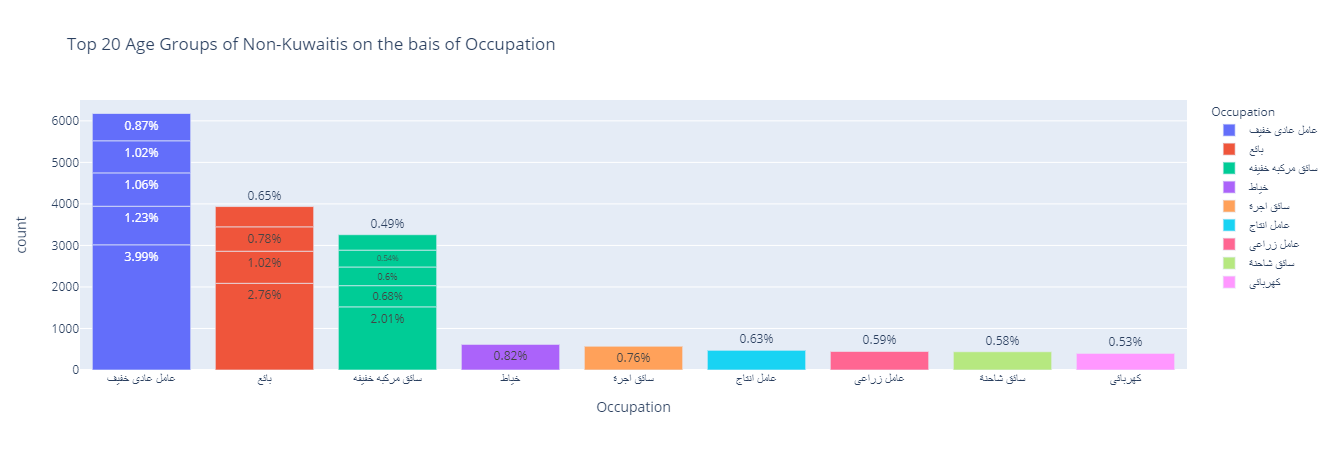

In [130]:
#hide_input

fig = px.bar(df_insight25,x="Occupation", y="count", hover_data = df_insight25.columns, color="Occupation",
            text = "Percentage",title = "Top 20 Age Groups of Non-Kuwaitis on the bais of Occupation")
fig.show()

In [131]:
#hide_input

pd.crosstab([insight25["Educational Level"], insight25['count']],[insight25['Age Group']],margins=True)

Age Group                20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Educational Level count                                                    
ابتدائي           0       1254   1254   1254   1254   1254   1254   1254   
                  1          0      0      0      0      0      0      0   
                  2          0      0      0      0      0      0      0   
                  3          0      0      0      0      0      0      0   
                  4          0      0      0      0      0      0      0   
...                        ...    ...    ...    ...    ...    ...    ...   
متوسط             773        0      0      0      0      0      0      0   
                  1521       0      0      0      0      0      0      0   
                  2088       0      0      0      0      0      0      0   
                  3015       0      0      0      0      0      0      0   
All                      15048  15048  15048  15048  15048  15048  15048   

Age Group                56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Educational Level count                                                    
ابتدائي           0       1254   1037    886   1055   1117   1206   1227   
                  1          0     95    123     93     78     33     22   
                  2          0     42     54     27     19     11      1   
                  3          0     14     22     27      6      1      1   
                  4          0     11     24     12      8      1      0   
...                        ...    ...    ...    ...    ...    ...    ...   
متوسط             773        0      1      0      0      0      0      0   
                  1521       0      0      1      0      0      0      0   
                  2088       0      0      1      0      0      0      0   
                  3015       0      0      1      0      0      0      0   
All                      15048  15048  15048  15048  15048  15048  15048   

Age Group                Above 90     All  
Educational Level count                    
ابتدائي           0          1244   17804  
                  1             8     452  
                  2             0     154  
                  3             2      73  
                  4             0      56  
...                           ...     ...  
متوسط             773           0       1  
                  1521          0       1  
                  2088          0       1  
                  3015          0       1  
All                         15048  225720  

[463 rows x 16 columns]

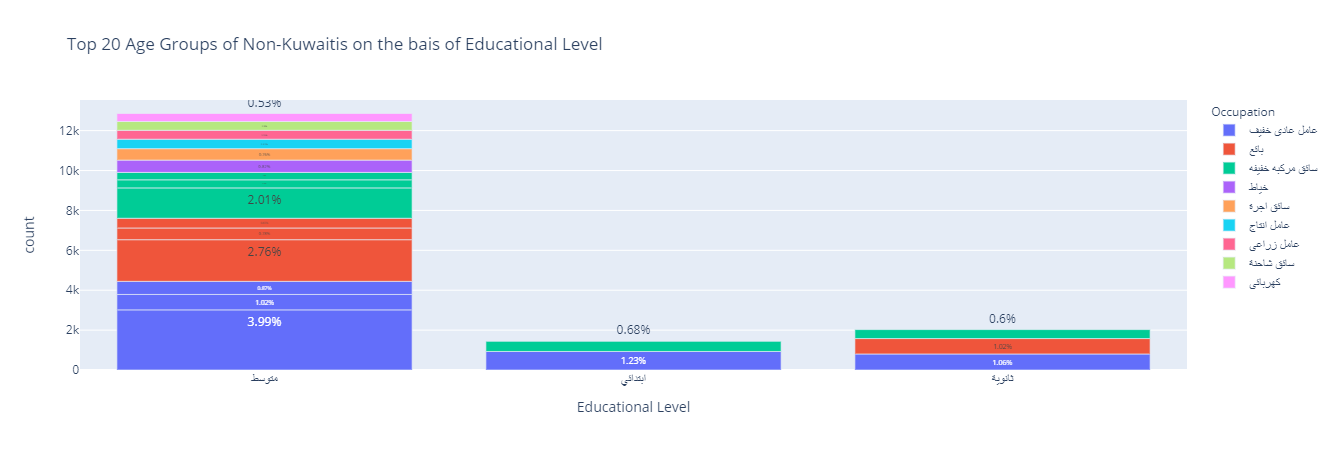

In [132]:
#hide_input

fig = px.bar(df_insight25,x="Educational Level", y="count", hover_data = df_insight25.columns, color="Occupation",
            text = "Percentage",title = "Top 20 Age Groups of Non-Kuwaitis on the bais of Educational Level")
fig.show()

In [133]:
#hide_input

df1['COUNTER'] = 1
insight_25 = df1.groupby(["Occupation","Educational Level","Age Group"])['COUNTER'].agg(['count'])
insight_25['Percentage'] = ((insight_25['count'] / 75528)*100).round(2) 
insight_25['Percentage'] = insight_25['Percentage'].astype(str) + '%'
insight_25 = insight_25.reset_index(["Occupation","Educational Level","Age Group"])

In [134]:
#hide_input

df_insight_25 = insight_25.nlargest(20,'count')

In [135]:
#hide_input

pd.crosstab([insight_25["Occupation"], insight_25['count']],[insight_25['Age Group']],margins=True)

Age Group            20-25  26-30  31-35  36-40  41-45  46-50  51-55  56-60  \
Occupation    count                                                           
أخصائى        0          3      3      3      3      3      3      3      3   
              1          0      0      0      0      0      0      0      0   
أخصائى ادارى  0          3      3      3      3      3      3      3      3   
              1          0      0      0      0      0      0      0      0   
أخصائى تجميل  0          3      3      3      3      3      3      3      3   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
نائب مدير عام 0          3      3      3      3      3      3      3      3   
              3          0      0      0      0      0      0      0      0   
وكيل مدرسة    0          3      3      3      3      3      3      3      3   
              1          0      0      0      0      0      0      0      0   
All                    696    696    696    696    696    696    696    696   

Age Group            61-65  66-70  71-75  76-80  80-85  86-90  Above 90    All  
Occupation    count                                                             
أخصائى        0          3      2      3      3      3      3         3     44  
              1          0      1      0      0      0      0         0      1  
أخصائى ادارى  0          3      3      3      2      3      3         3     44  
              1          0      0      0      1      0      0         0      1  
أخصائى تجميل  0          3      2      3      3      3      3         3     44  
...                    ...    ...    ...    ...    ...    ...       ...    ...  
نائب مدير عام 0          3      2      3      3      3      3         3     44  
              3          0      1      0      0      0      0         0      1  
وكيل مدرسة    0          3      2      3      3      3      3         3     44  
              1          0      1      0      0      0      0         0      1  
All                    696    696    696    696    696    696       696  10440  

[604 rows x 16 columns]

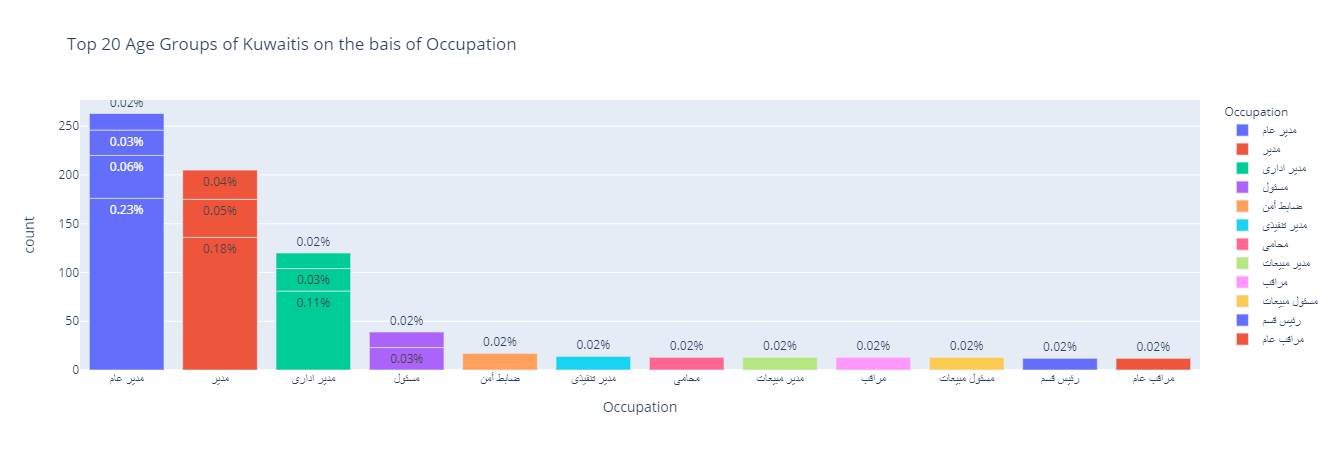

In [136]:
#hide_input

fig = px.bar(df_insight_25,x="Occupation", y="count", hover_data = df_insight25.columns, color="Occupation",
            text = "Percentage",title = "Top 20 Age Groups of Kuwaitis on the bais of Occupation")
fig.show()

In [137]:
#hide_input

pd.crosstab([insight_25["Educational Level"], insight_25['count']],[insight_25['Age Group']],margins=True)

Age Group                20-25  26-30  31-35  36-40  41-45  46-50  51-55  \
Educational Level count                                                    
ابتدائي           0        232    232    232    232    232    232    232   
                  1          0      0      0      0      0      0      0   
غير معرف          0        232    232    232    232    232    232    232   
                  1          0      0      0      0      0      0      0   
                  2          0      0      0      0      0      0      0   
                  3          0      0      0      0      0      0      0   
                  4          0      0      0      0      0      0      0   
                  5          0      0      0      0      0      0      0   
                  6          0      0      0      0      0      0      0   
                  7          0      0      0      0      0      0      0   
                  8          0      0      0      0      0      0      0   
                  9          0      0      0      0      0      0      0   
                  10         0      0      0      0      0      0      0   
                  11         0      0      0      0      0      0      0   
                  12         0      0      0      0      0      0      0   
                  13         0      0      0      0      0      0      0   
                  14         0      0      0      0      0      0      0   
                  16         0      0      0      0      0      0      0   
                  17         0      0      0      0      0      0      0   
                  23         0      0      0      0      0      0      0   
                  26         0      0      0      0      0      0      0   
                  30         0      0      0      0      0      0      0   
                  39         0      0      0      0      0      0      0   
                  44         0      0      0      0      0      0      0   
                  81         0      0      0      0      0      0      0   
                  136        0      0      0      0      0      0      0   
                  176        0      0      0      0      0      0      0   
متوسط             0        232    232    232    232    232    232    232   
                  1          0      0      0      0      0      0      0   
All                        696    696    696    696    696    696    696   

Age Group                56-60  61-65  66-70  71-75  76-80  80-85  86-90  \
Educational Level count                                                    
ابتدائي           0        232    232    232    232    231    232    232   
                  1          0      0      0      0      1      0      0   
غير معرف          0        232    142     47    142    177    226    224   
                  1          0     61     87     50     35      5      8   
                  2          0     11     30     18      8      1      0   
                  3          0      5     17     11      7      0      0   
                  4          0      5     11      3      1      0      0   
                  5          0      3      7      1      0      0      0   
                  6          0      0      5      1      1      0      0   
                  7          0      1      3      0      1      0      0   
                  8          0      1      3      0      0      0      0   
                  9          0      0      4      2      0      0      0   
                  10         0      0      2      0      1      0      0   
                  11         0      0      2      0      0      0      0   
                  12         0      0      4      0      0      0      0   
                  13         0      0      4      0      0      0      0   
                  14         0      0      1      0      0      0      0   
                  16         0      0      0      2      0      0      0   
                  17         0      0      1   

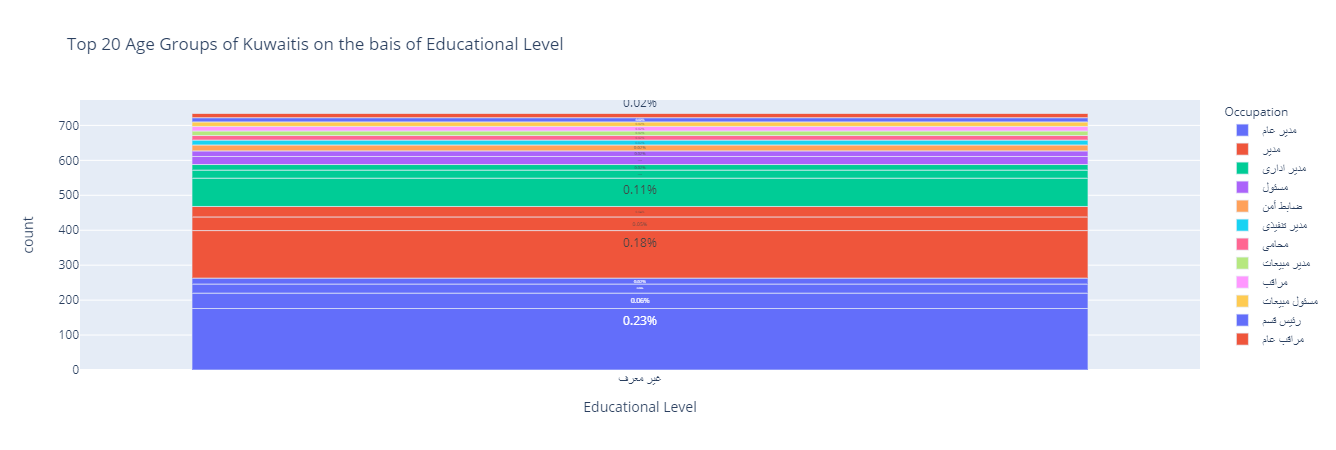

In [138]:
#hide_input

fig = px.bar(df_insight_25,x="Educational Level", y="count", hover_data = df_insight25.columns, color="Occupation",
            text = "Percentage",title = "Top 20 Age Groups of Kuwaitis on the bais of Educational Level")
fig.show()

In [139]:
#hide_input

rslt1 = insight_25[insight_25['Occupation'].isin(insight25['Occupation'])]
rslt2 = insight_25[insight_25['Educational Level'].isin(insight25['Educational Level'])]
rslt_df = rslt1.merge(rslt2, how = 'inner' ,indicator=False)
rslt_df = rslt_df.nlargest(20,'count')
rslt_df.reset_index(inplace=True,drop=True)

In [140]:
#hide_input

rslt_df.style.background_gradient(cmap='Reds')

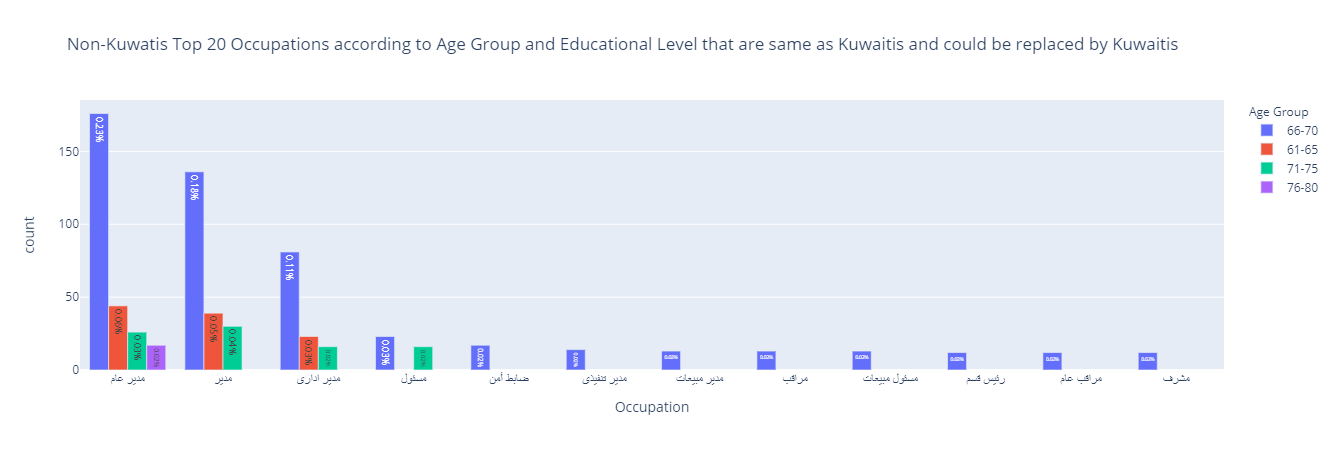

In [141]:
#hide_input

fig = px.bar(rslt_df, x="Occupation", y="count",barmode='group',text="Percentage",color="Age Group",title =
"Non-Kuwatis Top 20 Occupations according to Age Group and Educational Level that are same as Kuwaitis and could be replaced by Kuwaitis")
fig.show()